__<font size="5">Blackwell Electronics Customers CompleteResponses Brand Prefer</font>__

***Customer Brand Prefer***

**Author:** *Alidu Okpanachi*

In [1]:
#This cell contains the code to hide the code with a button to hide and show the code when you export the Notebook to html
#The option to export with automatic table of contents is File > Export Notebook As > Export Notebook to Html_toc

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
from IPython.display import HTML, display

# JavaScript code to hide code cells by default when exporting to HTML
hide_code_js = """
<script>
function hideCodeCells() {
    if (typeof codeCells === 'undefined') {
        codeCells = document.querySelectorAll('.input');
    }
    codeCells.forEach(function(cell) {
        cell.style.display = 'none';
    });
}
hideCodeCells();
</script>
"""

# JavaScript code to toggle code cells visibility
toggle_code_js = """
<script>
function toggleCodeCells() {
    if (typeof codeCells === 'undefined') {
        codeCells = document.querySelectorAll('.input');
    }
    codeCells.forEach(function(cell) {
        cell.style.display = (cell.style.display === 'none') ? 'block' : 'none';
    });
}
</script>
<button onclick="toggleCodeCells()">Toggle code</button>
"""

# Display JavaScript code to hide code cells by default and toggle code cells visibility
display(HTML(hide_code_js))
display(HTML(toggle_code_js))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

__<font size="6">Table of Contents</font>__


* [Introduction](#Introduction)
* [Data Description](#Description)
* [Data Preparation](#Preparation)
    * [Missing Values](#Missing)
    * [Duplicates](#Duplicates)
    * [Outliers](#Outliers)
    * [Data Transformation](#Transformation)
    * [Descretization](#descretization)
    * [Feature Engineerin](#Engineering)
    * [Feature Scaling](#Feature) 
    * [Handling Correlations](#Correlations)  
     
    
* [Exploratory Data Analysis](#EDA)
    * [Univariate Analysis](#Univar)
    * [Observations](#Observations1)
    * [Bivariate Analysis](#Bivar)
    * [Observations](#Observations2)
    * [Multivariate Analysis](#Multivar)       
    * [Observations](#Observations3)
    * [Features Selection](#Selection)

* [Modelling Using Brand as Target](#Modelling)
    * [Feature Importance method](#Importance)
    * [Recursive Features Elimination with Cross validation method](#Elimination)
    * [Using Dictionary to check the best performing Algorithm](#Dictionary)
    * [Modelling using Random Forest Classifier  for Brand ](#Random)
    * [Confusion Matrix](#Matrix)
    * [Evaluate the Model's Performance](#Performance)
    * [Plot the ROC Curve (for binary classification)](#ROC)
    * [Best Performing Models](#Best)
    
    
* [Survey Incomplete](#Incomplete)
    * [Missing Values](#Missing1)
    * [Duplicates](#Duplicates1)
    * [Outliers](#Outliers1)
    * [Data Transformation](#Transformation1)
    * [Descretization](#descretization1)
    * [Feature Engineerin](#Engineering1)
    * [Feature Scaling](#Feature1) 
    
* [Predicted Results for Incomplete Surveys](#Predicted)
    * [Conclusion](#Conclusion)
    * [Recommendations](#Recommendations)
    

# Introduction <a class="anchor" id="Introduction"></a>
The primary goal of this analysis is to predict the missing brand preferences of customers based on their survey responses, such as income, age, and other demographic information. We were provided with three datasets: one with complete responses, one with incomplete responses, and a key that provides the description of the survey questions. The task required using two decision tree classifiers, C5.0 and RandomForest, to predict customer brand preferences.
The analysis aimed to determine which classifier performs better on the given data and, based on this, predict the brand preferences for the incomplete survey data. A comparison of the performance metrics of both models was made to select the most suitable one for the task.



# Data Description <a class="anchor" id="Description"></a>

We observed that there were seven variables in our dataset which were all numerical datatype. In the real sense this was wrong as there are four fields that are categorical such as the elevel, car, zipcode,  and the brand columns.
 These Variables are: 
 * __salary__which is numerical variable
 * __age__ which is numerical variable 
 * __elevel__ which is categorical but seen as numerical
 * __car__ which is categorical but seen as numerical
 * __zipcode__ which is categorical but seen as numerical 
 * __credit__ which is numerical 
 * __brand__ which is categorical but seen as numerical 

elevel was mapped as:
   
* __Less than High School Degree "0"__
* __High School Degree "1"__
* __Some College "2"__
* __4-Year College Degree "3"__
* __Masters, Doctoral or Professional Degree "4"__


car was mapped as:
 
* __BMW was labelled "1"__
* __Buick was labelled "2"__
* __Cadillac was labelled "3"__
* __Chevrolet was labelled "4"__
* __Chrysler was labelled "5"__
* __Dodge was labelled "6"__
* __Ford was labelled "7"__
* __Honda was labelled "8"__
* __Hyundai was labelled "9"__
* __Jeep was labelled "10"__
* __Kia was labelled "11"__
* __Lincoln was labelled "12"__
* __Mazda was labelled "13"__
* __Mercedes Benz was labelled "14"__
* __Mitsubishi was labelled "15"__
* __Nissan was labelled "16"__
* __Ram was labelled "17"__
* __Subaru was labelled "18"__
* __Toyota was labelled "19"__
* __None of the above was labelled "20"__

zipcode was mapped as:
   
* __New England was labelled "0"__
* __Mid-Atlantic was labelled "1"__
* __East North Central was labelled "2"__
* __West North Central was labelled "3"__
* __South Atlantic was labelled "4"__
* __East South Central was labelled "5"__
* __West South Central was labelled "6"__
* __Mountain was labelled "7"__
* __Pacific was labelled "8"__


brand was mapped as:
   
* __Acer was labelled "0"__
* __Sony was labelled "1"__


In [4]:
# Load the complete and incomplete survey data
complete_data = pd.read_csv("CompleteResponses.csv")

# Inspect the first few rows of the complete data
complete_data.head()


salary  age  elevel  car  zipcode        credit  brand
0  119806.54480   45       0   14        4  442037.71130      0
1  106880.47840   63       1   11        6   45007.17883      1
2   78020.75094   23       0   15        2   48795.32279      0
3   63689.93635   51       3    6        5   40888.87736      1
4   50873.61880   20       3   14        4  352951.49770      0

In [5]:
# Inspect the first few rows of the complete dataa
complete_data.tail()

salary  age  elevel  car  zipcode       credit  brand
9893   87580.91422   75       1   18        8  282511.9095      1
9894  129181.38200   75       2    7        4  384871.3639      1
9895   97828.08884   66       2   15        0  399446.6962      1
9896   20000.00000   24       1   14        1  223204.6495      1
9897   96430.16419   34       1    2        7  224029.8070      0

# Data Preparation <a class="anchor" id="Preparation"></a>
To analyze the data for the first phase of my Project, I transformed and cleaned the data for meaningful insight. I copied my original data to Responsesdataset_new which still contains the original data.

I replaced the 0,1,2,3 and 4 in elevel to Less than High School Degree, High School Degree, Some College, 4-Year College Degree and Master's, Doctoral or Professional Degree respectively.I also raplaced 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19 and 20 in car to BMW, Buick, Cadillac, Chevrolet, Chrysler, Dodge, Ford, Honda, Hyundai, Jeep, Kia, Lincoln, Mazda, Mercedes Benz, Mitsubishi, Nissan, Ram, Subaru, Toyota and None of the above respectively. I also replaced the 0,1,2,3,4,5,6,7 and 8 in the zipcode to New England, Mid-Atlantic, East North Central, West North Central, South Atlantic, East South Central, West South Central, Mountain and Pacific respectively. And i also replaced 0 and 1 in Brand to Acer and Sony respectively.

To analyze the data for the second phase of my Project, I copied complete_data_copy to complete_data where I descretized the Age into three(3) bins which I renamed as Age Range. I also converted the elevel, car, zipcode and the brand back to thier Original state.

## Missing Values <a class="anchor" id="Missing"></a>

I checked for missing values and discovered that there was none in my data

In [6]:
# Check for missing values
complete_data.isnull().sum()

salary     0
age        0
elevel     0
car        0
zipcode    0
credit     0
brand      0
dtype: int64

In [7]:
# Check data types
print(complete_data.dtypes)

salary     float64
age          int64
elevel       int64
car          int64
zipcode      int64
credit     float64
brand        int64
dtype: object



## duplicates <a class="anchor" id="duplicates"></a>

I checked for duplicate values and discovered that there was none in my data


In [8]:


# Assuming df is your dataset

# Check for duplicate rows
duplicates = complete_data[complete_data.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


## Outliers <a class="anchor" id="Outliers"></a>
Using Boxplots, I checked for Outliers on the Salary, Age and Credit and discovered that there is no any Outliers which is shown below 

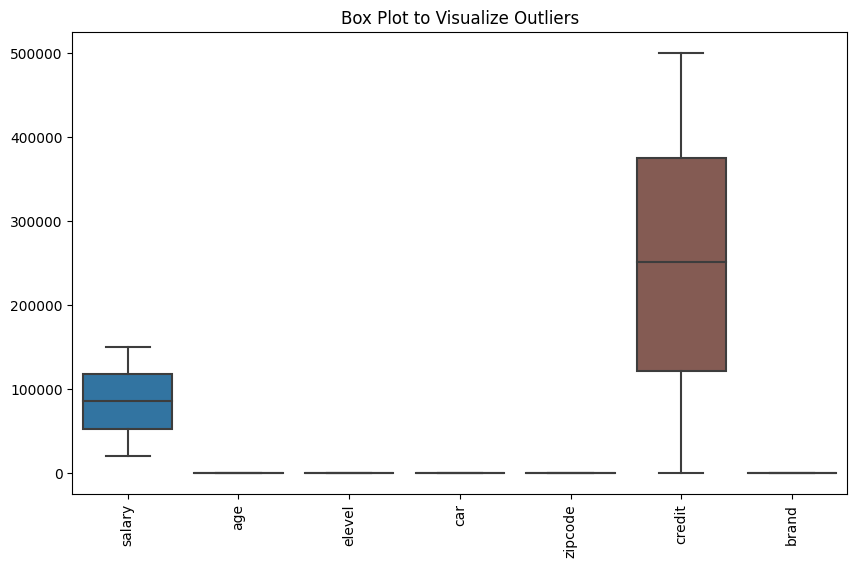

In [9]:

# Plot boxplot for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=complete_data)

# Set labels and title
plt.title("Box Plot to Visualize Outliers")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [10]:
# Create a copy of the complete_data dataframe
complete_data_copy = complete_data.copy()

# Optionally, check the first few rows of the copied dataframe to ensure the copy was successful
print(complete_data_copy.head())


         salary  age  elevel  car  zipcode        credit  brand
0  119806.54480   45       0   14        4  442037.71130      0
1  106880.47840   63       1   11        6   45007.17883      1
2   78020.75094   23       0   15        2   48795.32279      0
3   63689.93635   51       3    6        5   40888.87736      1
4   50873.61880   20       3   14        4  352951.49770      0


In [11]:
# Show the Datatype of all the variables of Mydataset_new
complete_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   9898 non-null   float64
 1   age      9898 non-null   int64  
 2   elevel   9898 non-null   int64  
 3   car      9898 non-null   int64  
 4   zipcode  9898 non-null   int64  
 5   credit   9898 non-null   float64
 6   brand    9898 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 541.4 KB


# Data Transformation <a class="anchor" id="Transformation"></a>


* __Converting elevel to Categorical data type from Numerical data type__
* __Converting elevel to Categorical Data Type__
* __Converting car to Categorical data type from Numerical data type__
* __Converting car to Categorical Data Type__
* __Converting zipcode to Categorical data type from Numerical data type__
* __Converting zipcodeto Categorical Data Type__
* __Converting brand to Categorical data type from Numerical data type__
* __Converting brand to Categorical Data Type__


In [12]:
# Converting Numerical data type to Categorical Data type
complete_data_copy["elevel"]=complete_data_copy["elevel"].values.astype('str')


In [13]:
#This code mapped 0,1,3, & 4 to Less than High School Degree, High School Degree, Some College, 4-Year College Degree & "Master's, Doctoral or Professional Degree
complete_data_copy['elevel'].replace(['0','1','2','3','4'],["Less than High School Degree","High School Degree","Some College","4-Year College Degree","Master's, Doctoral or Professional Degree"], inplace=True)

In [14]:
# Converting Numerical data type to Categorical Data type
complete_data_copy['elevel']=complete_data_copy['elevel'].values.astype('str')
print(complete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car          int64
zipcode      int64
credit     float64
brand        int64
dtype: object


In [15]:
# Converting Numerical data type to Categorical Data type
complete_data_copy["car"]=complete_data_copy["car"].values.astype('str')


In [16]:
#This code mapped 1,3, & 4 to BMW, Buick, Cadillac, Chevrolet, Chrysler, Dodge, Ford, Honda, Hyundai, Jeep, Kia, Lincoln, Mazda, Mercedes Benz, Mitsubishi, Nissan, Ram, Subaru, Toyota & None of the above
complete_data_copy['car'].replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],["BMW","Buick","Cadillac","Chevrolet","Chrysler","Dodge","Ford","Honda","Hyundai","Jeep","Kia","Lincoln","Mazda","Mercedes Benz","Mitsubishi","Nissan","Ram","Subaru","Toyota","None of the above"], inplace=True)

In [17]:
# Converting Numerical data type to Categorical Data type
complete_data_copy["car"]=complete_data_copy["car"].values.astype('str')
print(complete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car         object
zipcode      int64
credit     float64
brand        int64
dtype: object


In [18]:
# Converting Numerical data type to Categorical Data type
complete_data_copy["zipcode"]=complete_data_copy["zipcode"].values.astype('str')


In [19]:
#This code mapped 0,1,3,4,5,6,7 & 8 to New England, Mid-Atlantic, East North Central, West North Central, South Atlantic, East South Central, West South Central, Mountain & Pacific
complete_data_copy['zipcode'].replace(['0','1','2','3','4','5','6','7','8'],["New England","Mid-Atlantic","East North Central","West North Central","South Atlantic","East South Central","West South Central","Mountain","Pacific"], inplace=True)

In [20]:
# Converting Numerical data type to Categorical Data type
complete_data_copy["zipcode"]=complete_data_copy["zipcode"].values.astype('str')
print(complete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car         object
zipcode     object
credit     float64
brand        int64
dtype: object


In [21]:
# Converting Numerical data type to Categorical Data type
complete_data_copy["brand"]=complete_data_copy["brand"].values.astype('str')


In [22]:
#This code mapped 0 & 1 to New England, & Sony
complete_data_copy['brand'].replace(['0','1'],["Acer","Sony"], inplace=True)

In [23]:
# Converting Numerical data type to Categorical Data type
complete_data_copy["brand"]=complete_data_copy["brand"].values.astype('str')
print(complete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car         object
zipcode     object
credit     float64
brand       object
dtype: object


In [24]:
complete_data_copy.head()

salary  age                        elevel            car  \
0  119806.54480   45  Less than High School Degree  Mercedes Benz   
1  106880.47840   63            High School Degree            Kia   
2   78020.75094   23  Less than High School Degree     Mitsubishi   
3   63689.93635   51         4-Year College Degree          Dodge   
4   50873.61880   20         4-Year College Degree  Mercedes Benz   

              zipcode        credit brand  
0      South Atlantic  442037.71130  Acer  
1  West South Central   45007.17883  Sony  
2  East North Central   48795.32279  Acer  
3  East South Central   40888.87736  Sony  
4      South Atlantic  352951.49770  Acer

## Data Descretization<a class="anchor" id="Descretization"></a>

I discretize the Age

In [25]:
# Conversion of Age from numeric data type to categorical using age range
complete_data_copy['Age Range']=pd.cut(x=complete_data_copy.age,bins=[17, 37, 52, 116],labels=['18-37 years', '38-52 years', '>52 years'])

In [26]:
complete_data_copy.head()

salary  age                        elevel            car  \
0  119806.54480   45  Less than High School Degree  Mercedes Benz   
1  106880.47840   63            High School Degree            Kia   
2   78020.75094   23  Less than High School Degree     Mitsubishi   
3   63689.93635   51         4-Year College Degree          Dodge   
4   50873.61880   20         4-Year College Degree  Mercedes Benz   

              zipcode        credit brand    Age Range  
0      South Atlantic  442037.71130  Acer  38-52 years  
1  West South Central   45007.17883  Sony    >52 years  
2  East North Central   48795.32279  Acer  18-37 years  
3  East South Central   40888.87736  Sony  38-52 years  
4      South Atlantic  352951.49770  Acer  18-37 years

## Feature Engineering<a class="anchor" id="Engineering"></a>
**I created new variables Age Range to add more meaning to our data**

In [27]:
complete_modeling=complete_data_copy.copy()

In [28]:
complete_modeling.head()

salary  age                        elevel            car  \
0  119806.54480   45  Less than High School Degree  Mercedes Benz   
1  106880.47840   63            High School Degree            Kia   
2   78020.75094   23  Less than High School Degree     Mitsubishi   
3   63689.93635   51         4-Year College Degree          Dodge   
4   50873.61880   20         4-Year College Degree  Mercedes Benz   

              zipcode        credit brand    Age Range  
0      South Atlantic  442037.71130  Acer  38-52 years  
1  West South Central   45007.17883  Sony    >52 years  
2  East North Central   48795.32279  Acer  18-37 years  
3  East South Central   40888.87736  Sony  38-52 years  
4      South Atlantic  352951.49770  Acer  18-37 years

In [29]:
complete_data_copy.head()

salary  age                        elevel            car  \
0  119806.54480   45  Less than High School Degree  Mercedes Benz   
1  106880.47840   63            High School Degree            Kia   
2   78020.75094   23  Less than High School Degree     Mitsubishi   
3   63689.93635   51         4-Year College Degree          Dodge   
4   50873.61880   20         4-Year College Degree  Mercedes Benz   

              zipcode        credit brand    Age Range  
0      South Atlantic  442037.71130  Acer  38-52 years  
1  West South Central   45007.17883  Sony    >52 years  
2  East North Central   48795.32279  Acer  18-37 years  
3  East South Central   40888.87736  Sony  38-52 years  
4      South Atlantic  352951.49770  Acer  18-37 years

In [30]:
# Apply one-hot encoding to categorical columns
complete_modeling = pd.get_dummies(complete_modeling, columns=['elevel', 'car', 'zipcode', 'Age Range'], drop_first=True)

# Check the dataset after transformation
complete_modeling.head()


salary  age        credit brand  elevel_High School Degree  \
0  119806.54480   45  442037.71130  Acer                          0   
1  106880.47840   63   45007.17883  Sony                          1   
2   78020.75094   23   48795.32279  Acer                          0   
3   63689.93635   51   40888.87736  Sony                          0   
4   50873.61880   20  352951.49770  Acer                          0   

   elevel_Less than High School Degree  \
0                                    1   
1                                    0   
2                                    1   
3                                    0   
4                                    0   

   elevel_Master's, Doctoral or Professional Degree  elevel_Some College  \
0                                                 0                    0   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    0   

   car_Buick  car_Cadillac  ...  zipcode_East South Central  \
0          0             0  ...                           0   
1          0             0  ...                           0   
2          0             0  ...                           0   
3          0             0  ...                           1   
4          0             0  ...                           0   

   zipcode_Mid-Atlantic  zipcode_Mountain  zipcode_New England  \
0                     0                 0                    0   
1                     0                 0                    0   
2                     0                 0                    0   
3                     0                 0                    0   
4                     0                 0                    0   

   zipcode_Pacific  zipcode_South Atlantic  zipcode_West North Central  \
0                0                       1                           0   
1                0                       0                           0   
2                0                       0                           0   
3                0                       0                           0   
4                0                       1                           0   

   zipcode_West South Central  Age Range_38-52 years  Age Range_>52 years  
0                           0                      1                    0  
1                           1                      0                    1  
2                           0                      0                    0  
3                           0                      1                    0  
4                           0                      0                    0  

[5 rows x 37 columns]

In [31]:
#This code mapped 0 & 1 to New England, & Sony
complete_modeling['brand'].replace(['Acer','Sony'],["0","1"], inplace=True)

In [32]:
# Converting Numerical data type to Categorical Data type
complete_modeling["brand"]=complete_modeling["brand"].values.astype('int64')
print(complete_modeling.dtypes)

salary                                              float64
age                                                   int64
credit                                              float64
brand                                                 int64
elevel_High School Degree                             uint8
elevel_Less than High School Degree                   uint8
elevel_Master's, Doctoral or Professional Degree      uint8
elevel_Some College                                   uint8
car_Buick                                             uint8
car_Cadillac                                          uint8
car_Chevrolet                                         uint8
car_Chrysler                                          uint8
car_Dodge                                             uint8
car_Ford                                              uint8
car_Honda                                             uint8
car_Hyundai                                           uint8
car_Jeep                                

In [33]:
complete_modeling.head()

salary  age        credit  brand  elevel_High School Degree  \
0  119806.54480   45  442037.71130      0                          0   
1  106880.47840   63   45007.17883      1                          1   
2   78020.75094   23   48795.32279      0                          0   
3   63689.93635   51   40888.87736      1                          0   
4   50873.61880   20  352951.49770      0                          0   

   elevel_Less than High School Degree  \
0                                    1   
1                                    0   
2                                    1   
3                                    0   
4                                    0   

   elevel_Master's, Doctoral or Professional Degree  elevel_Some College  \
0                                                 0                    0   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    0   

   car_Buick  car_Cadillac  ...  zipcode_East South Central  \
0          0             0  ...                           0   
1          0             0  ...                           0   
2          0             0  ...                           0   
3          0             0  ...                           1   
4          0             0  ...                           0   

   zipcode_Mid-Atlantic  zipcode_Mountain  zipcode_New England  \
0                     0                 0                    0   
1                     0                 0                    0   
2                     0                 0                    0   
3                     0                 0                    0   
4                     0                 0                    0   

   zipcode_Pacific  zipcode_South Atlantic  zipcode_West North Central  \
0                0                       1                           0   
1                0                       0                           0   
2                0                       0                           0   
3                0                       0                           0   
4                0                       1                           0   

   zipcode_West South Central  Age Range_38-52 years  Age Range_>52 years  
0                           0                      1                    0  
1                           1                      0                    1  
2                           0                      0                    0  
3                           0                      1                    0  
4                           0                      0                    0  

[5 rows x 37 columns]

## Feature Scaling <a class="anchor" id="feature"></a>

I scaled salary, age and credit columns


In [34]:
# Select numeric columns for scaling
scaler = StandardScaler()
complete_modeling[['salary', 'age', 'credit']] = scaler.fit_transform(complete_data[['salary', 'age', 'credit']])

# Inspect the scaled data
complete_modeling.head()


salary       age    credit  brand  elevel_High School Degree  \
0  0.926419 -0.271579  1.328210      0                          0   
1  0.583648  0.751393 -1.406080      1                          1   
2 -0.181650 -1.521877 -1.379992      0                          0   
3 -0.561673  0.069412 -1.434442      1                          0   
4 -0.901534 -1.692373  0.714687      0                          0   

   elevel_Less than High School Degree  \
0                                    1   
1                                    0   
2                                    1   
3                                    0   
4                                    0   

   elevel_Master's, Doctoral or Professional Degree  elevel_Some College  \
0                                                 0                    0   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    0   

   car_Buick  car_Cadillac  ...  zipcode_East South Central  \
0          0             0  ...                           0   
1          0             0  ...                           0   
2          0             0  ...                           0   
3          0             0  ...                           1   
4          0             0  ...                           0   

   zipcode_Mid-Atlantic  zipcode_Mountain  zipcode_New England  \
0                     0                 0                    0   
1                     0                 0                    0   
2                     0                 0                    0   
3                     0                 0                    0   
4                     0                 0                    0   

   zipcode_Pacific  zipcode_South Atlantic  zipcode_West North Central  \
0                0                       1                           0   
1                0                       0                           0   
2                0                       0                           0   
3                0                       0                           0   
4                0                       1                           0   

   zipcode_West South Central  Age Range_38-52 years  Age Range_>52 years  
0                           0                      1                    0  
1                           1                      0                    1  
2                           0                      0                    0  
3                           0                      1                    0  
4                           0                      0                    0  

[5 rows x 37 columns]

# Exploratory Data Analysis <a class="anchor" id="EDA"></a>

## Univariate Analysis <a class="anchor" id="Univar"></a>

Looking at the Region with respect to the number of transactions carried out,

We observed that the West carried out the highest number of transactions followed by South, East and the North with the least number of transactions.



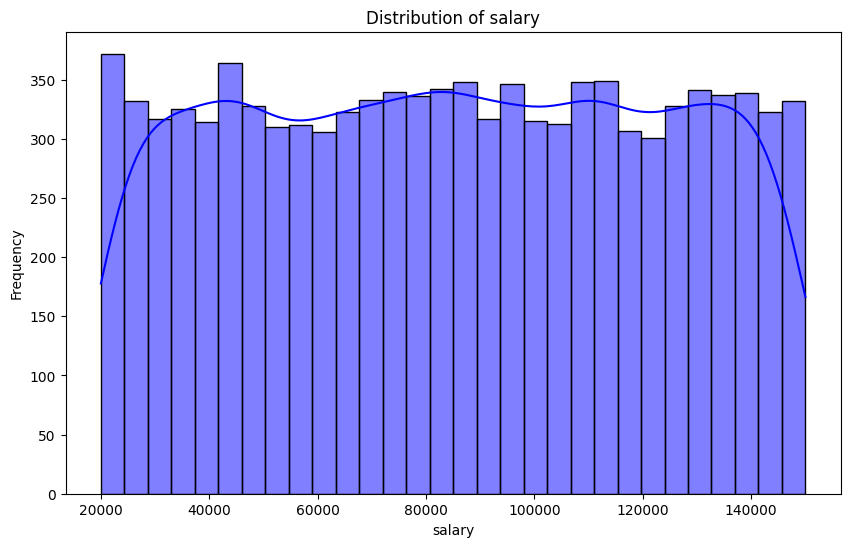

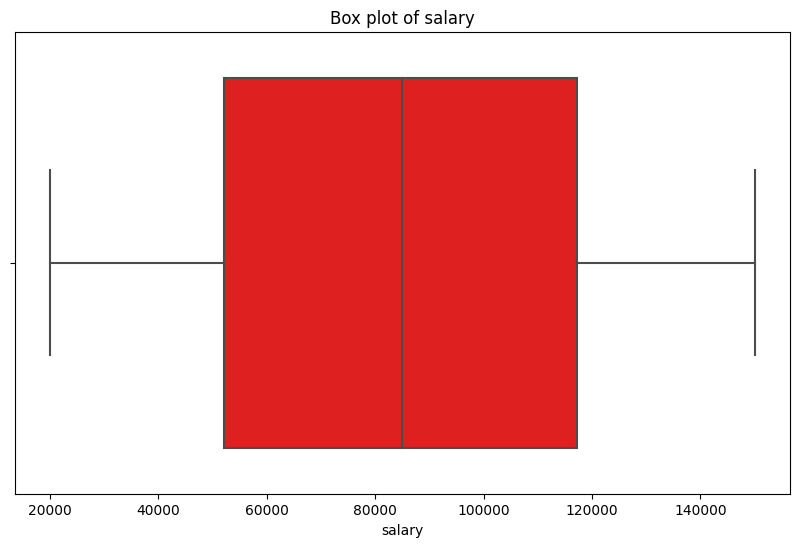

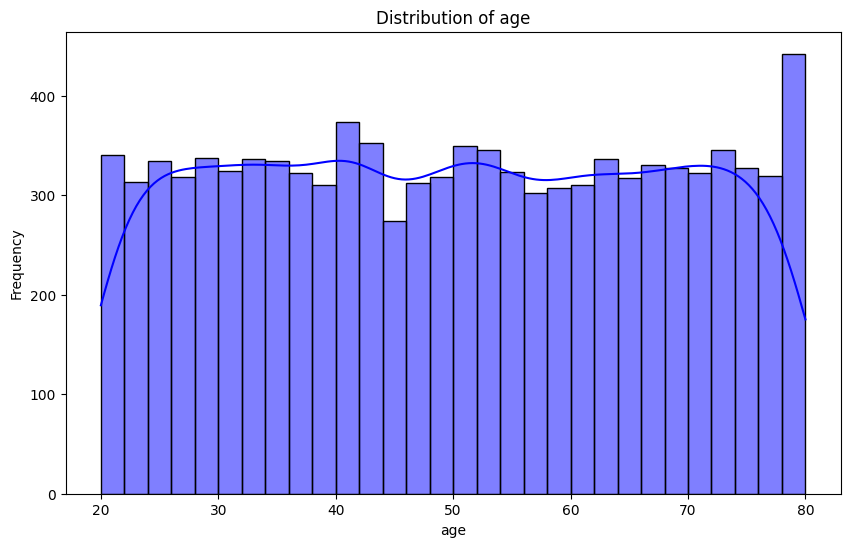

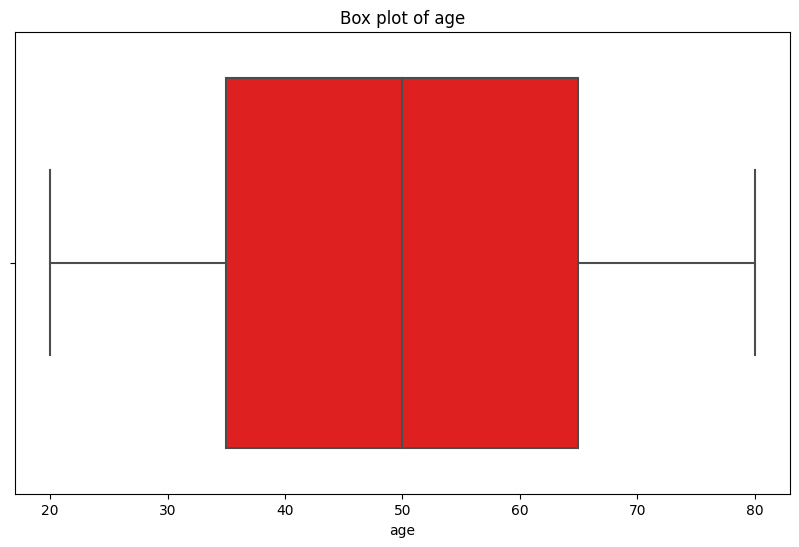

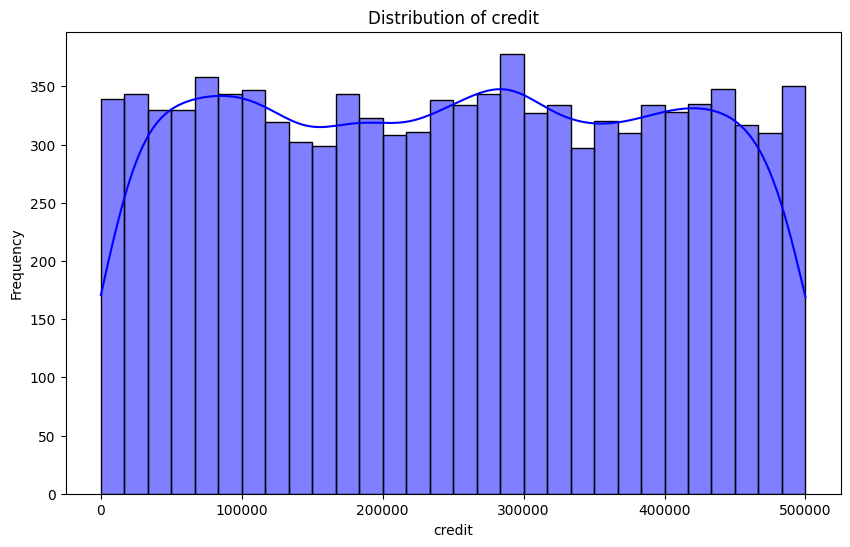

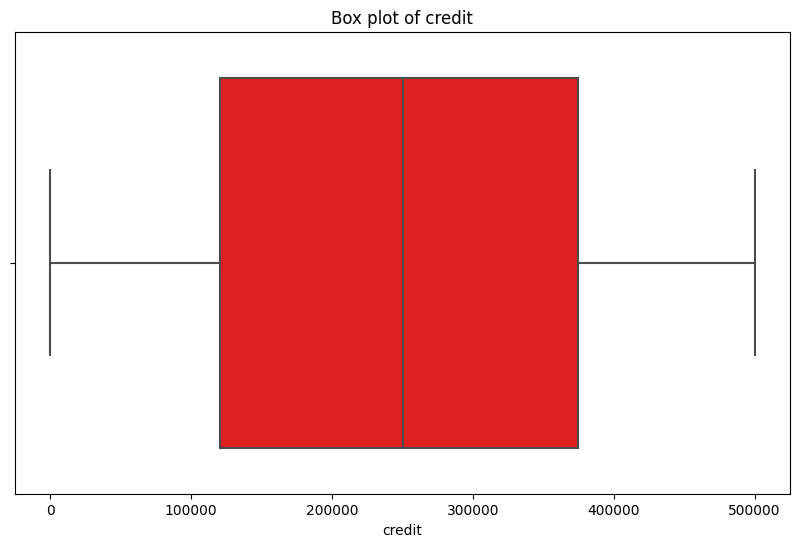

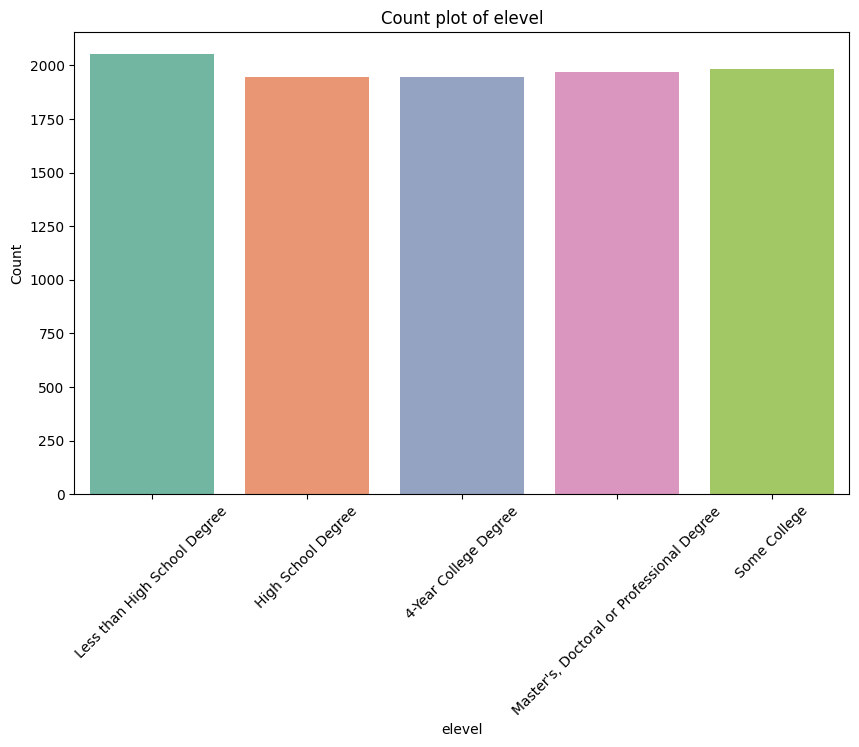

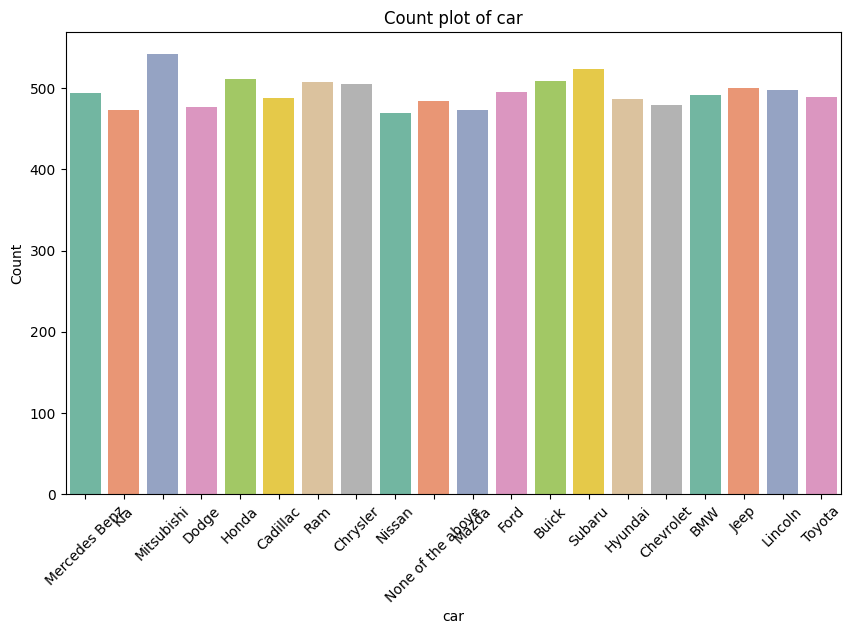

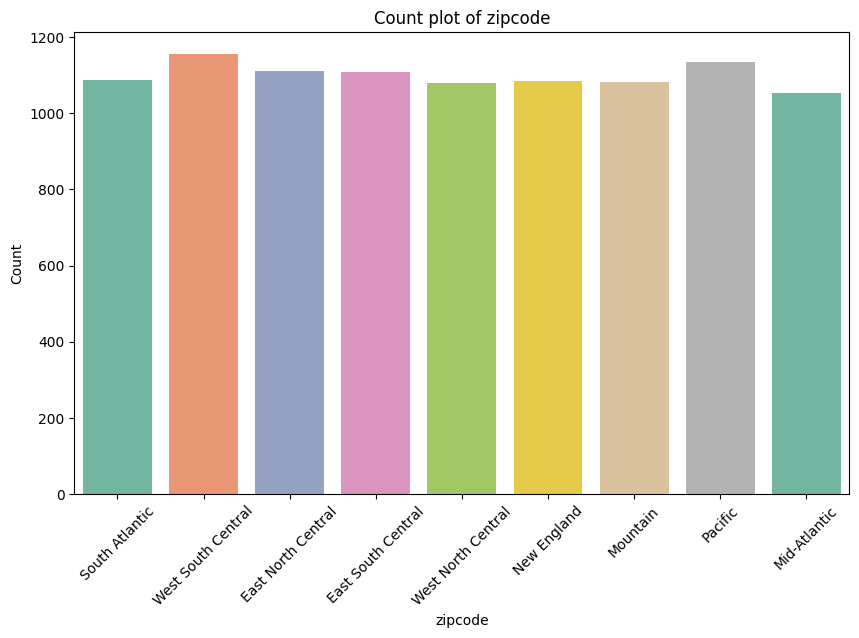

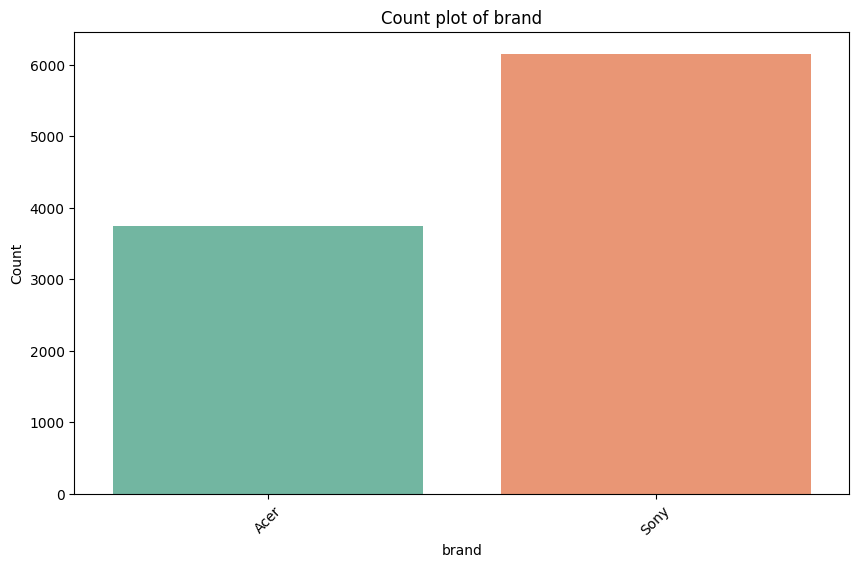

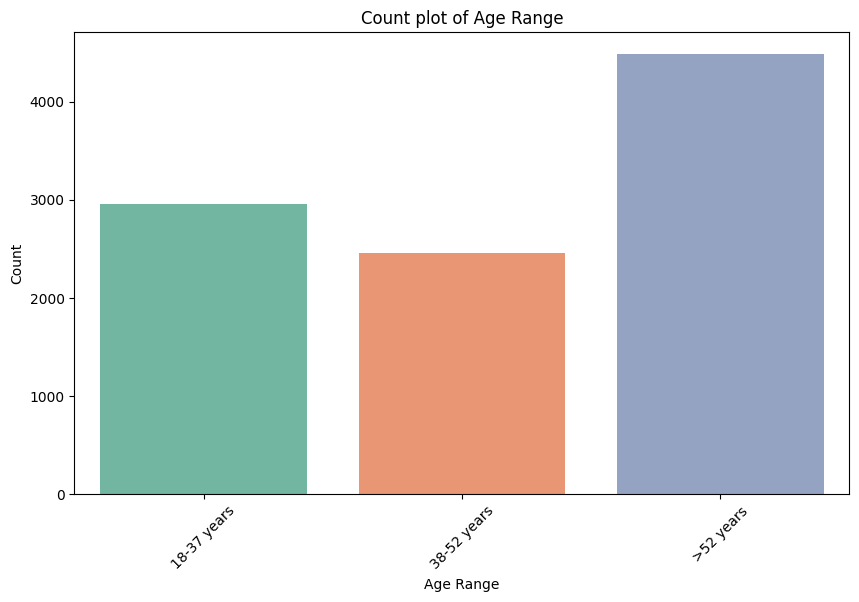

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for numerical columns
numerical_columns = complete_data_copy.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    # Plotting histogram and KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(complete_data_copy[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Plotting box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=complete_data_copy[col], color='red')
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

# Univariate analysis for categorical columns
categorical_columns = complete_data_copy.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    # Plotting count plot for categorical variables
    plt.figure(figsize=(10, 6))
    sns.countplot(data=complete_data_copy, x=col, palette='Set2')
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()


#### Observations <a class="anchor" id="Observations1"></a>
* Customers with _Less than High School Degree_ education are highest of over 2000, followed by _High School Degree_ with above 1750, then _Some College_ graduates with above 1750  and then _ College Degree_ with above 1750 and the  _ Masters, Doctoral or Professional Degree_ with above 
* The _car_ Mitsubishi follow by Subaru are far greater than the _BMW, Buick, Cadillac, Chevrolet, Chrysler, Dodge, Ford, Honda, Hyundai, Jeep, Kia, Lincoln, Mazda, Mercedes Benz, Nissan, Ram, Toyota and the None of the above
* The _West South Central_ are the highest with over 1900, followed by _Parcific_ with over 1800 the rest are bello 1700.
* The _Sony_ is the highest with 6000 and  _Acer_ with over 3000.
* The _>52 years_ is the highest follow by 18-37 years and the 38-52 years is the least.

## Bivariate Analysis <a class="anchor" id="Bivar"></a>
Looking at the various relationships that exist between variables.
We can draw relationship between brand, age, salary, credit, elevel, zipcode, and  car where we observed that:


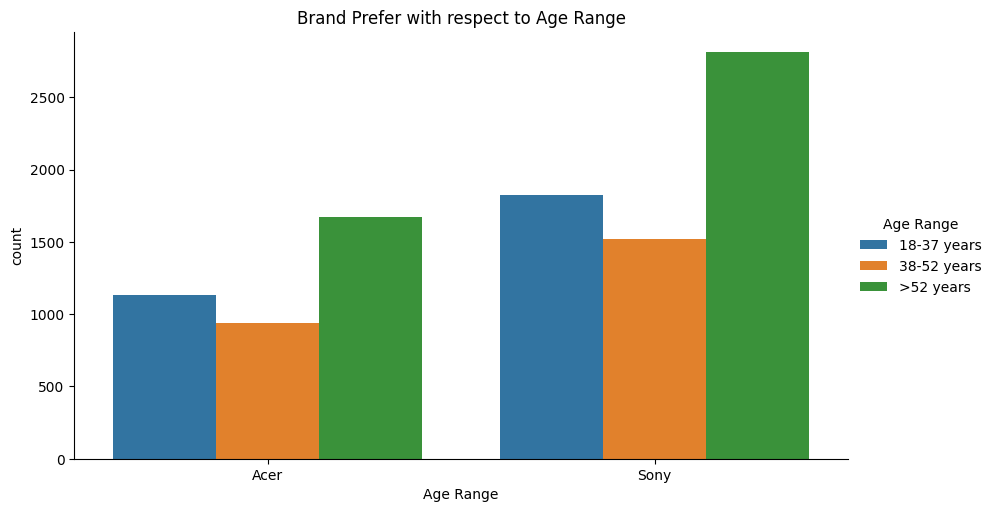

In [36]:

g= sns.catplot('brand', data=complete_data_copy, hue='Age Range', kind='count', aspect=1.75)
plt.title("Brand Prefer with respect to Age Range")
g.set_xlabels('Age Range')
#g.set_ylabels('Region')

Text(0.5, 1.0, 'Relationship between Brand Prefer and Salary')

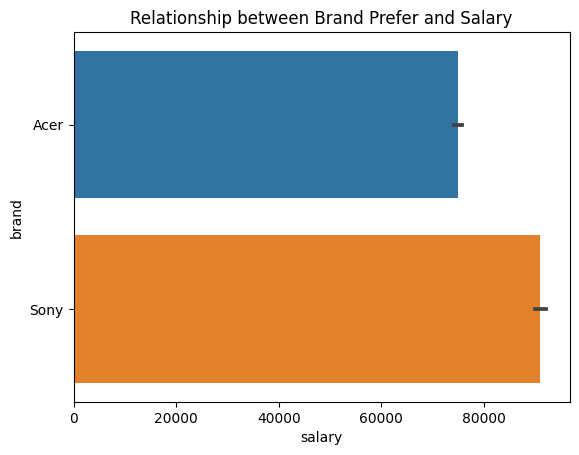

In [37]:

g=sns.barplot(x = 'salary',
            y = 'brand',
            data = complete_data_copy)
#g= sns.barplot('region', data=regions_amt_df, hue='Total Amount', kind='count', aspect=1.75)
plt.title("Relationship between Brand Prefer and Salary")

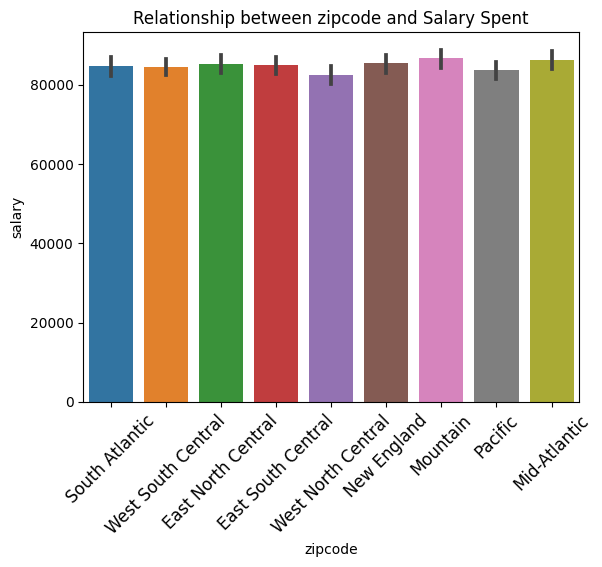

In [38]:
# Assuming Responsesdataset_new is already defined and contains the data
g = sns.barplot(x='zipcode', y='salary', data=complete_data_copy)

# Set the title
plt.title("Relationship between zipcode and Salary Spent")

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=12)  # Rotate labels by 45 degrees and set font size

plt.show()

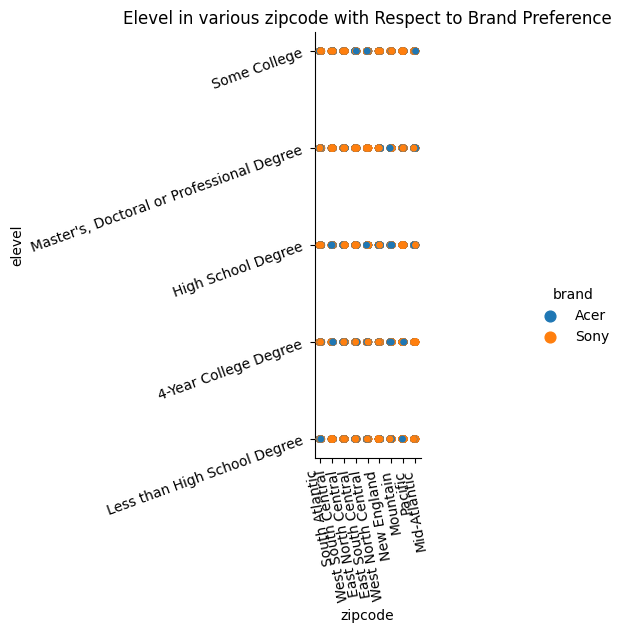

In [39]:
# Assuming 'complete_modeling' is already defined
g = sns.catplot(x='zipcode', y='elevel', data=complete_data_copy, hue='brand', kind='strip')

# Set the title
plt.title("Elevel in various zipcode with Respect to Brand Preference")

# Rotate x-axis labels
plt.xticks(rotation=100)  # Rotate x-axis labels by 45 degrees

# Rotate y-axis labels if needed (optional)
plt.yticks(rotation=20)  # Optional, rotate y-axis labels

# Show the plot
plt.show()


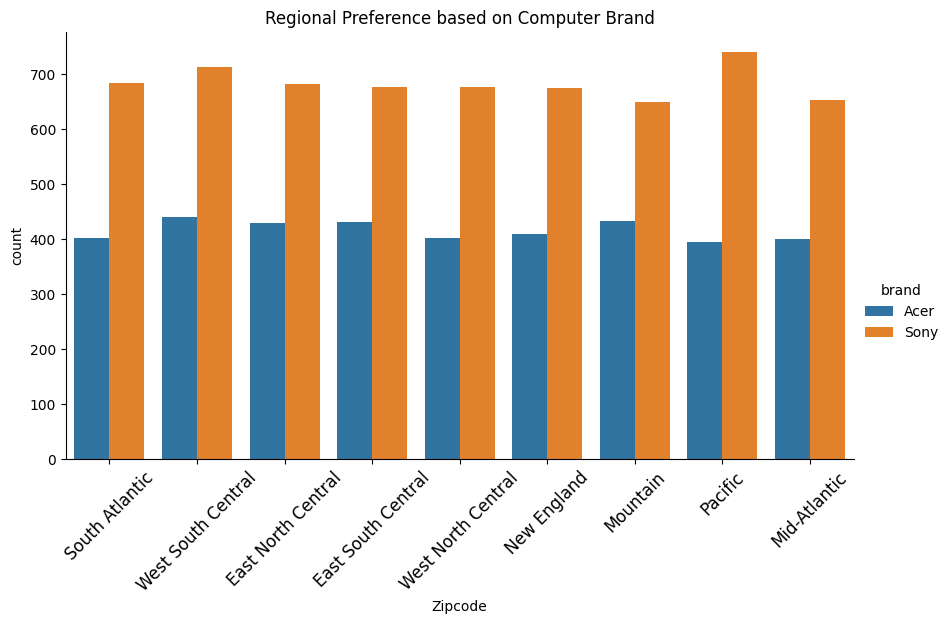

In [40]:
# Assuming Responsesdataset_new is already defined and contains the data
g = sns.catplot('zipcode', data=complete_data_copy, hue='brand', kind='count', aspect=1.75)

# Set the title
plt.title("Regional Preference based on Computer Brand")

# Rotate x-axis labels
g.set_xlabels('Zipcode')
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, fontsize=12)

plt.show()

#### Observations <a class="anchor" id="Observations2"></a>
* The _Customers_ with the Age Range >52years Prefered Sony follow by 18-37 year and the least is 38-52 years.
* The Customers with _Salary_ of 80000 and above prefered Sony and the Customers with the salary bello 80000 prefered Acer
* The _Customers_ in the the Parcific Region prefered Sony follow by West South Central


# Multivariate Analysis <a class="anchor" id="Multivar"></a>

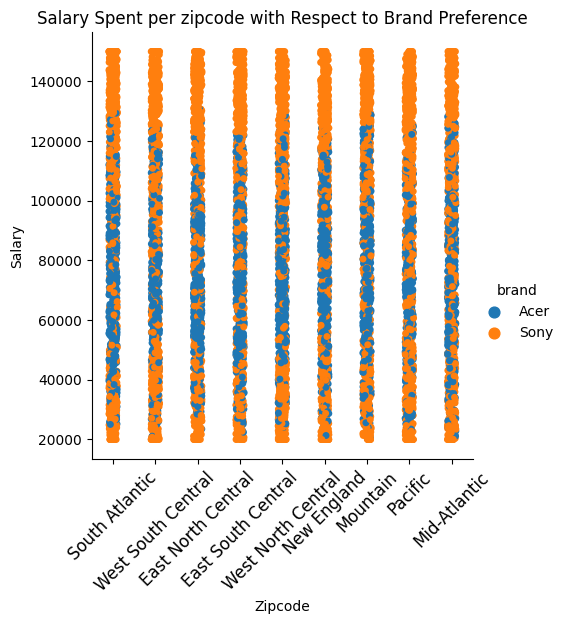

In [41]:
# Assuming Responsesdataset_new is already defined and contains the data
g = sns.catplot(x='zipcode', y='salary', data=complete_data_copy, hue='brand', kind='strip')

# Set the title
plt.title("Salary Spent per zipcode with Respect to Brand Preference")

# Rotate x-axis labels
g.set_xlabels('Zipcode')
g.set_ylabels('Salary')

# Rotate the x-axis labels by 45 degrees
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, fontsize=12)

plt.show()

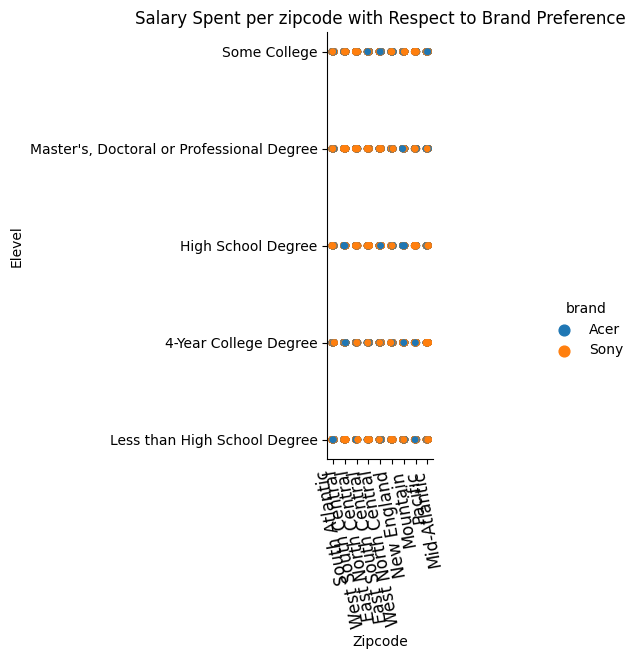

In [42]:
# Assuming Responsesdataset_new is already defined and contains the data
g = sns.catplot(x='zipcode', y='elevel', data=complete_data_copy, hue='brand', kind='strip')

# Set the title
plt.title("Salary Spent per zipcode with Respect to Brand Preference")

# Rotate x-axis labels
g.set_xlabels('Zipcode')
g.set_ylabels('Elevel')

# Rotate the x-axis labels by 45 degrees
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=100, fontsize=12)

plt.show()

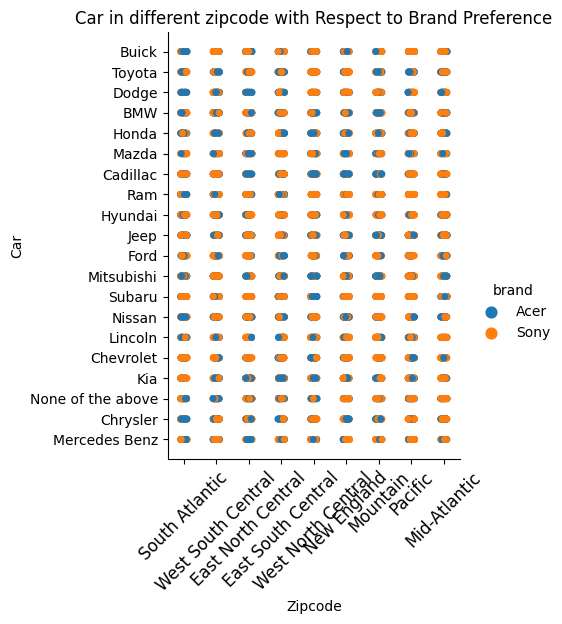

In [43]:
# Assuming Responsesdataset_new is already defined and contains the data
g = sns.catplot(x='zipcode', y='car', data=complete_data_copy, hue='brand', kind='strip')

# Set the title
plt.title("Car in different zipcode with Respect to Brand Preference")

# Rotate x-axis labels
g.set_xlabels('Zipcode')
g.set_ylabels('Car')

# Rotate the x-axis labels by 45 degrees
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, fontsize=12)

plt.show()

#### Observations<a class="anchor" id="Observations3"></a>
* The Customers with _Salary_ of 140000 and above prefered Sony 


## Features Selection <a class="anchor" id="Selection"></a>

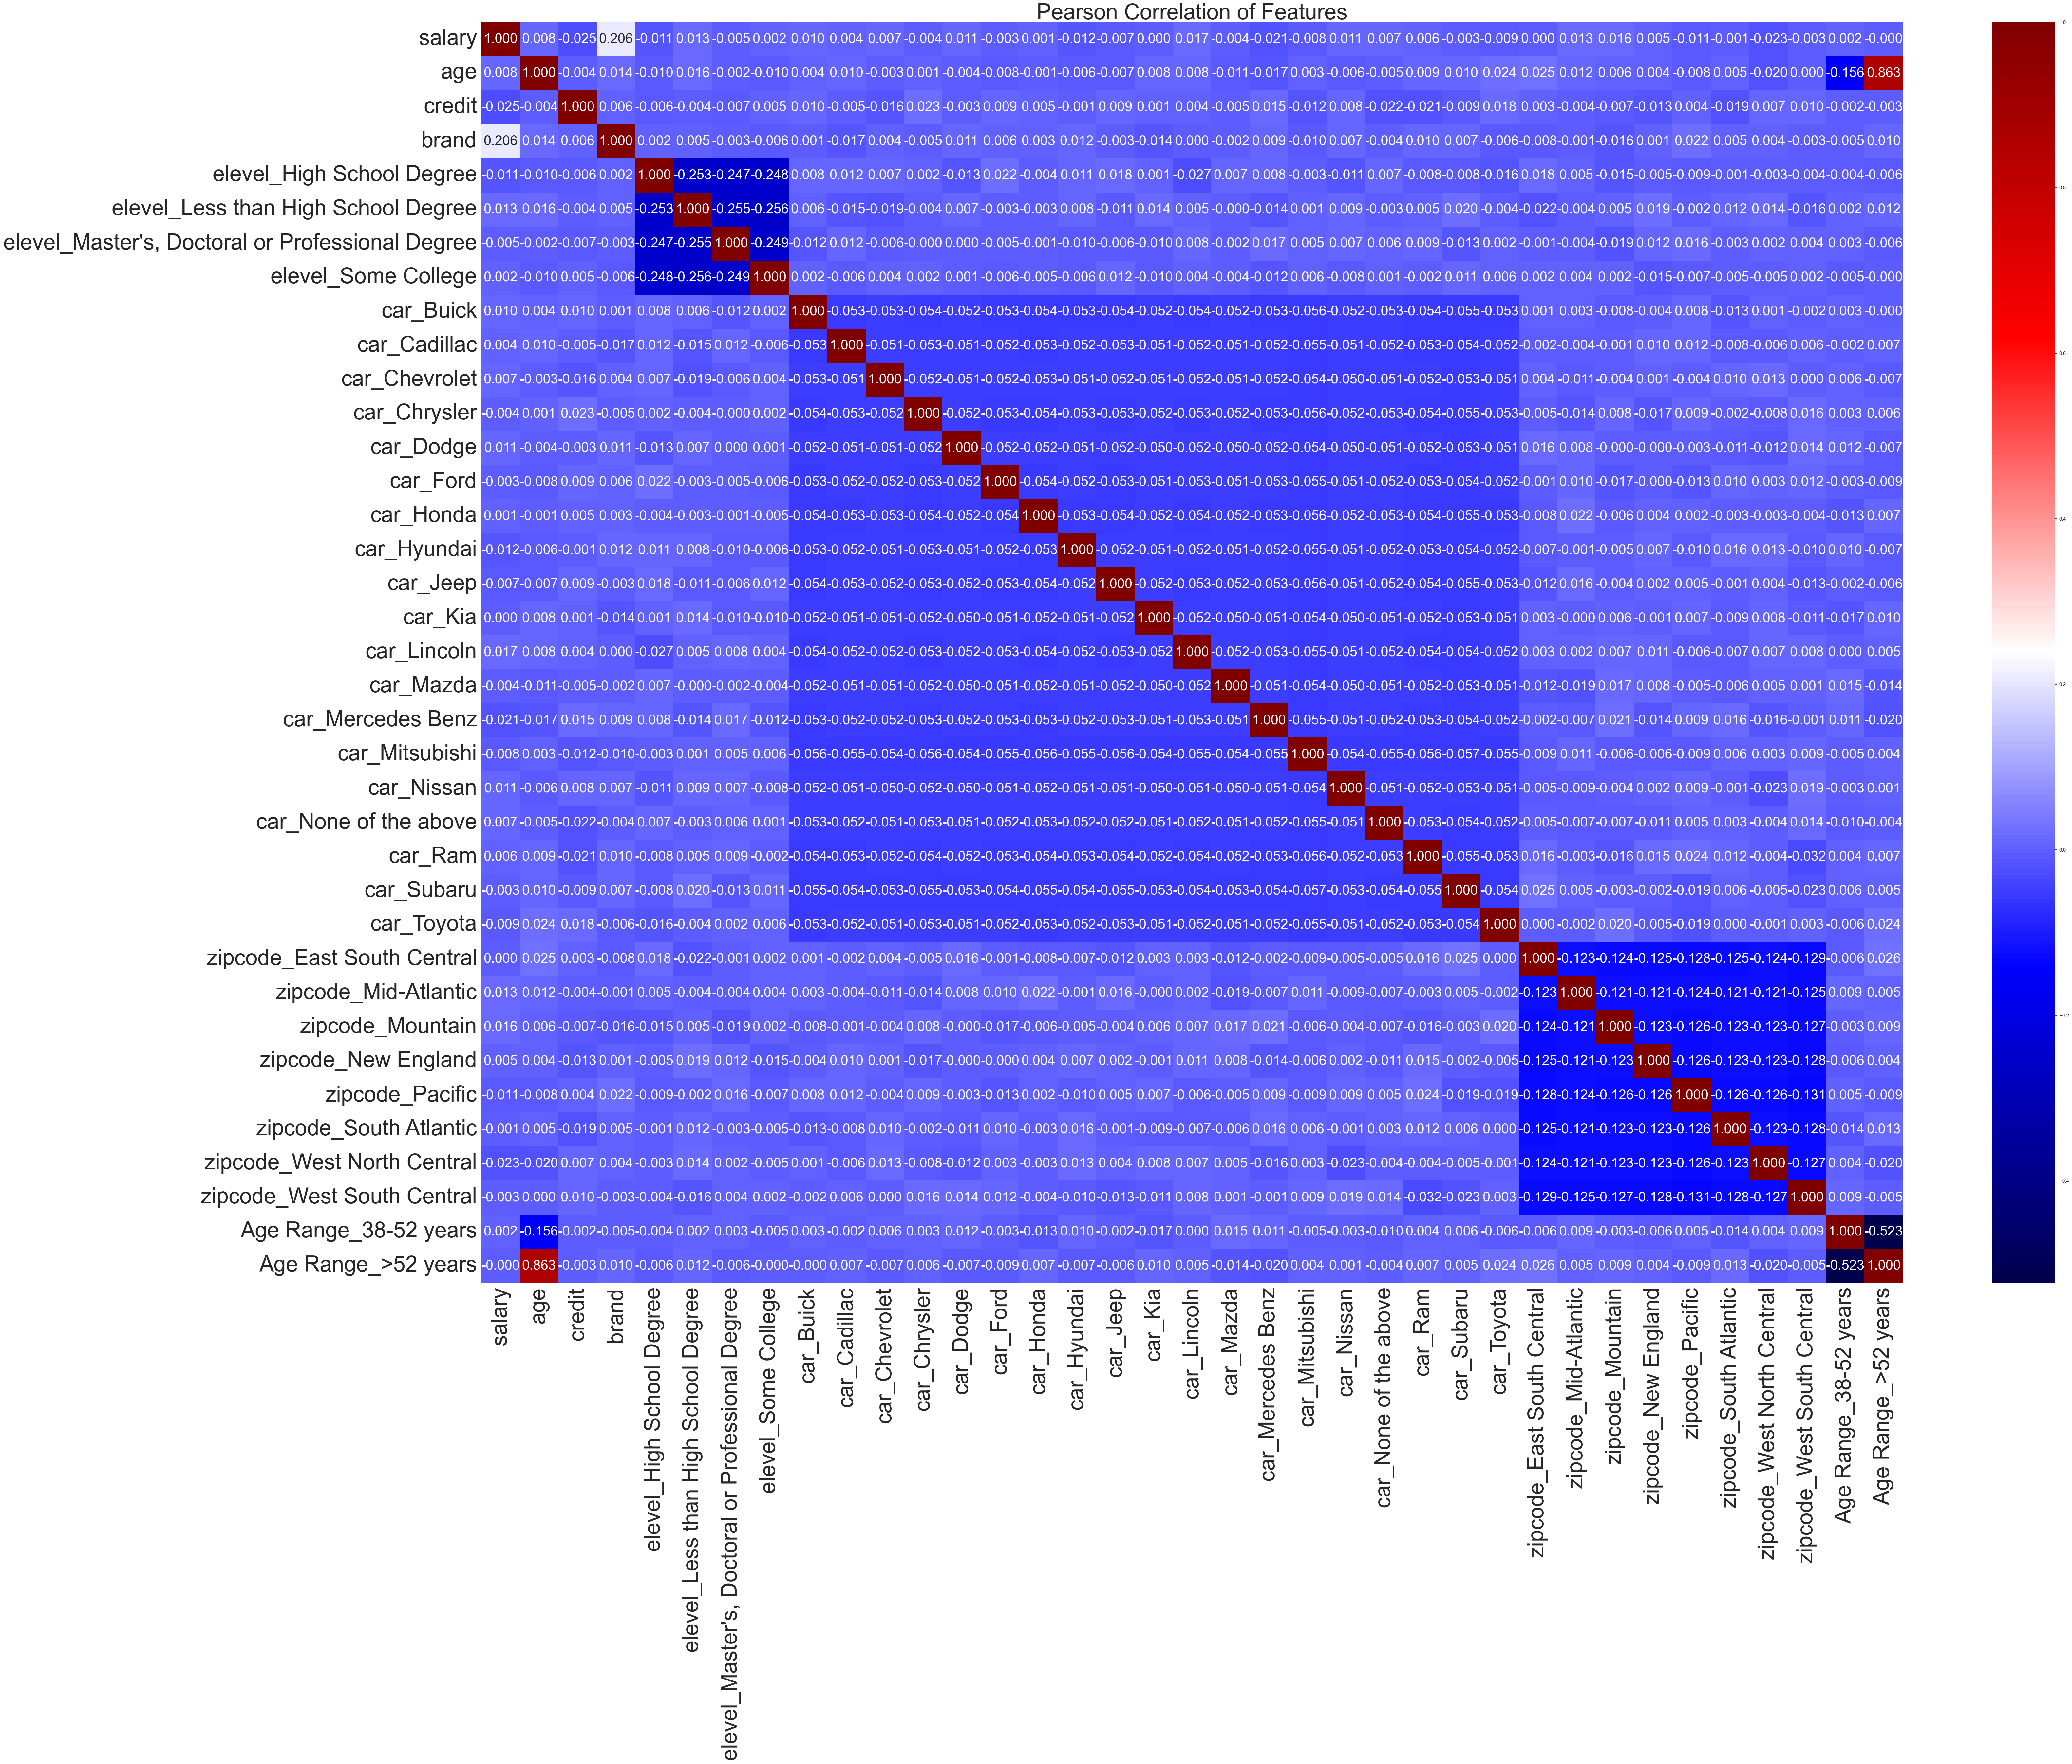

In [44]:
## Visualize the Correlation matrix
# Configure x and y axis
corrMat=complete_modeling.corr()
sns.set()
plt.figure(figsize=(70,50))
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.title('Pearson Correlation of Features', size =48)
# Plotting the data using heatmap
g = sns.heatmap(corrMat,annot=True,cmap="seismic",annot_kws={"size": 30},fmt=".3f")


## Handling Correlations <a class="anchor" id="Correlations"></a>

In [45]:
# Drop highly correlated features (if needed)
correlated_features = set()  # To store names of correlated features
threshold = 0.9  # Define the threshold for high correlation

for i in range(len(corrMat.columns)):
    for j in range(i):
        if abs(corrMat.iloc[i, j]) > threshold:
            column_name = corrMat.columns[i]  # Get column name
            correlated_features.add(column_name)

# Remove correlated features from your dataset
New_modeling = complete_modeling.drop(columns=correlated_features)
New_modeling


salary       age    credit  brand  elevel_High School Degree  \
0     0.926419 -0.271579  1.328210      0                          0   
1     0.583648  0.751393 -1.406080      1                          1   
2    -0.181650 -1.521877 -1.379992      0                          0   
3    -0.561673  0.069412 -1.434442      1                          0   
4    -0.901534 -1.692373  0.714687      0                          0   
...        ...       ...       ...    ...                        ...   
9893  0.071865  1.433374  0.229580      1                          1   
9894  1.175020  1.433374  0.934514      1                          0   
9895  0.343598  0.921888  1.034892      1                          0   
9896 -1.720236 -1.465046 -0.178861      1                          1   
9897  0.306528 -0.896728 -0.173178      0                          1   

      elevel_Less than High School Degree  \
0                                       1   
1                                       0   
2                                       1   
3                                       0   
4                                       0   
...                                   ...   
9893                                    0   
9894                                    0   
9895                                    0   
9896                                    0   
9897                                    0   

      elevel_Master's, Doctoral or Professional Degree  elevel_Some College  \
0                                                    0                    0   
1                                                    0                    0   
2                                                    0                    0   
3                                                    0                    0   
4                                                    0                    0   
...                                                ...                  ...   
9893                                                 0                    0   
9894                                                 0                    1   
9895                                                 0                    1   
9896                                                 0                    0   
9897                                                 0                    0   

      car_Buick  car_Cadillac  ...  zipcode_East South Central  \
0             0             0  ...                           0   
1             0             0  ...                           0   
2             0             0  ...                           0   
3             0             0  ...                           1   
4             0             0  ...                           0   
...         ...           ...  ...                         ...   
9893          0             0  ...                           0   
9894          0             0  ...                           0   
9895          0             0  ...                           0   
9896          0             0  ...                           0   
9897          1             0  ...                           0   

      zipcode_Mid-Atlantic  zipcode_Mountain  zipcode_New England  \
0                        0                 0                    0   
1                        0                 0                    0   
2                        0                 0                    0   
3                        0                 0                    0   
4                        0                 0                    0   
...                    ...               ...                  ...   
9893                     0                 0                    0   
9894                     0                 0                    0   
9895                     0                 0                    1   
9896                     1                 0                    0   
9897                     0                 1                    0   

      zipcode_Pacific  zipcode_

# Modelling Using Brand as Target <a class="anchor" id="Modelling"></a>

i will do my modelling on region using the following Lgorithms
* ___Dummy Classifier___
* ___KNeighbors Classifier___
* ___RBF SVM Classifier___
* ___DecisionTree Classifier___
* ___Random Forest Classifier___
* ___Gradient Boosting Classifier___
* ___Logistic Regression Classifier___

In [46]:
complete_data_copy.head()

salary  age                        elevel            car  \
0  119806.54480   45  Less than High School Degree  Mercedes Benz   
1  106880.47840   63            High School Degree            Kia   
2   78020.75094   23  Less than High School Degree     Mitsubishi   
3   63689.93635   51         4-Year College Degree          Dodge   
4   50873.61880   20         4-Year College Degree  Mercedes Benz   

              zipcode        credit brand    Age Range  
0      South Atlantic  442037.71130  Acer  38-52 years  
1  West South Central   45007.17883  Sony    >52 years  
2  East North Central   48795.32279  Acer  18-37 years  
3  East South Central   40888.87736  Sony  38-52 years  
4      South Atlantic  352951.49770  Acer  18-37 years

# Feature Importance method <a class="anchor" id="Importance"></a>
The feature_importances funtion using a Random Forest classifier.

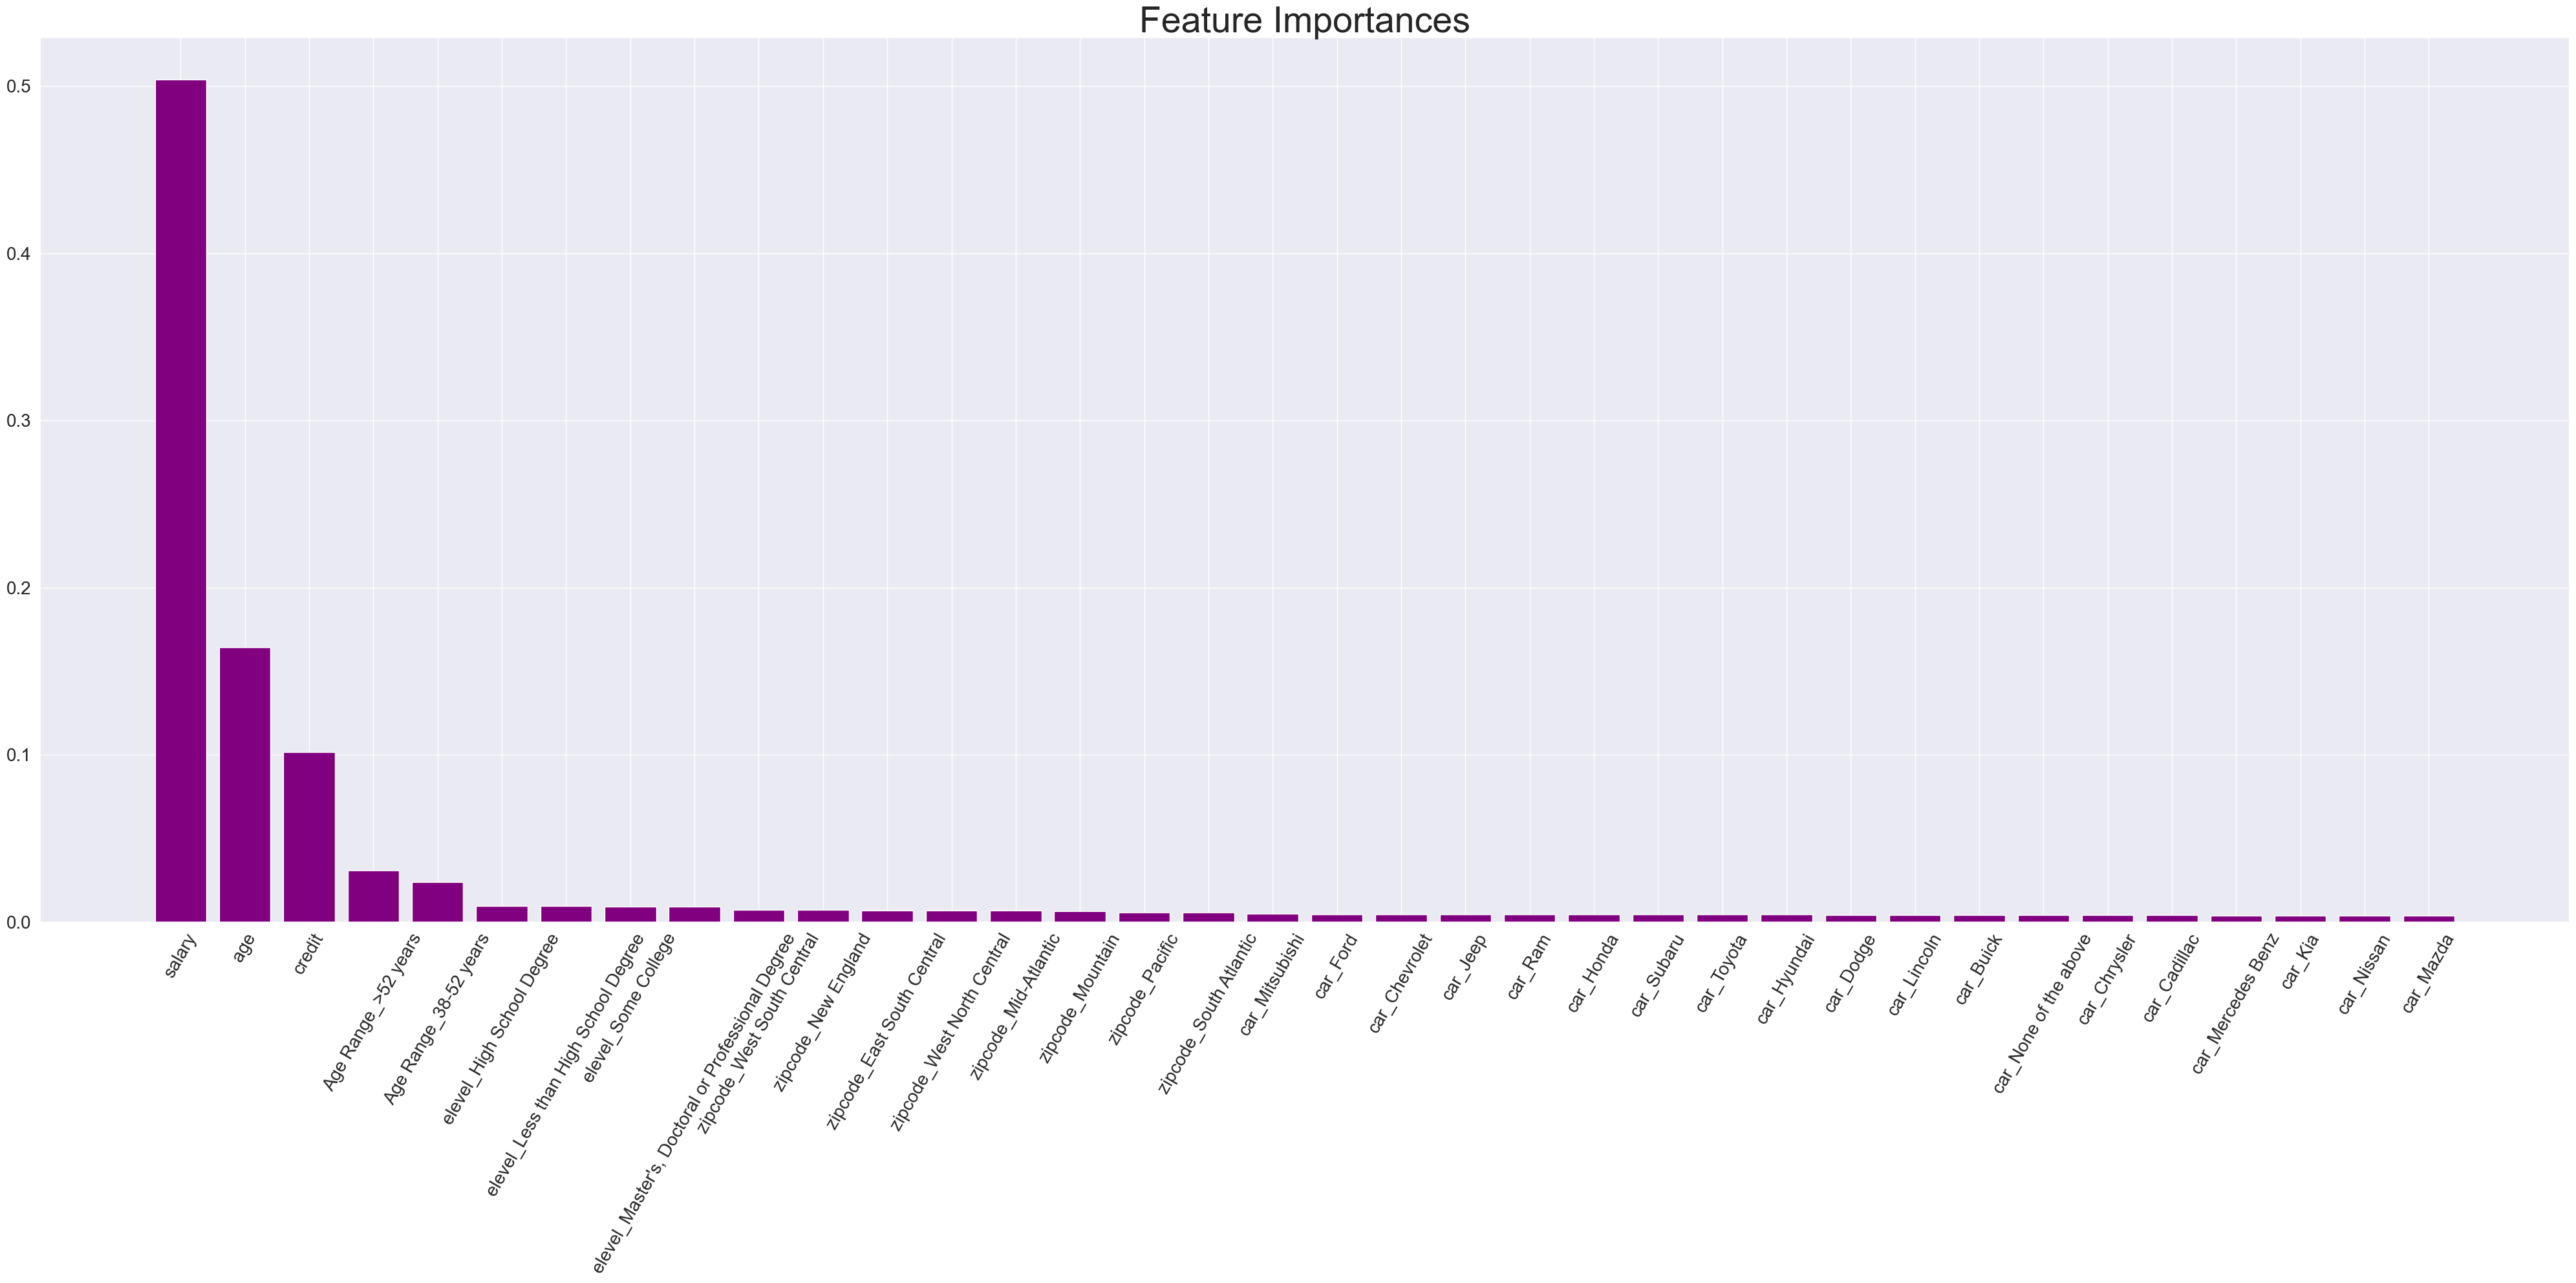

In [47]:
# Assuming `complete_modeling` is your DataFrame with features and target
# Define the features and target
X = complete_modeling.drop('brand', axis=1)  # Replace 'brand' with the actual target column name
y = complete_modeling['brand']

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, stratify=y)

# Fit a RandomForestClassifier to the data
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=23)
rf.fit(X_train, y_train)

# Extract the feature importances
importance_scores = rf.feature_importances_

# To order the scores
order_scores = np.argsort(importance_scores)[::-1]

# Create the plot
plt.figure(figsize=(40, 20))  # Adjusted figure size

# Title for the plot
plt.title("Feature Importances", fontsize=40)  # Increased title font size

# Plot the feature importances
plt.bar(range(X_train.shape[1]), importance_scores[order_scores], color="purple", align="center")

# Set x-ticks and labels with increased font size and rotate by 60 degrees
plt.xticks(range(X_train.shape[1]), X_train.columns[order_scores], fontsize=20, rotation=60)  # Rotate labels by 60 degrees

# Set y-ticks with larger font size
plt.yticks(fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


# Recursive Features Elimination with Cross validation method <a class="anchor" id="Feature6.3"></a>
The REFCV funtion using a Decision Tree classifier.

In [48]:
# Create RFECV object and fit the model
rfecv = RFECV(estimator=DecisionTreeClassifier(),
              step=1,
              cv=StratifiedKFold(5),
              scoring='accuracy')

# Fit RFECV with your training data
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(), scoring='accuracy')

In [49]:
print("Optimum number of features: %d" % rfecv.n_features_)


Optimum number of features: 20


In [50]:
# Here we create a table with three columns to show the first 15 features with the best Ranking
df_score_features = pd.DataFrame(columns = ['Feature', 'Support', 'Ranking'])
for i in range(X_train.shape[1]):
    row = {'Feature': i, 'Support': rfecv.support_[i], 'Ranking': rfecv.ranking_[i]}
    df_score_features = df_score_features.append(row, ignore_index=True)
df_score_features.sort_values(by='Ranking').head(25)



Feature Support Ranking
0        0    True       1
32      32    True       1
31      31    True       1
30      30    True       1
29      29    True       1
28      28    True       1
27      27    True       1
26      26    True       1
24      24    True       1
20      20    True       1
19      19    True       1
34      34    True       1
17      17    True       1
2        2    True       1
3        3    True       1
4        4    True       1
5        5    True       1
9        9    True       1
6        6    True       1
1        1    True       1
25      25   False       2
12      12   False       3
21      21   False       4
10      10   False       5
7        7   False       6

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   salary                                            9898 non-null   float64
 1   age                                               9898 non-null   float64
 2   credit                                            9898 non-null   float64
 3   elevel_High School Degree                         9898 non-null   uint8  
 4   elevel_Less than High School Degree               9898 non-null   uint8  
 5   elevel_Master's, Doctoral or Professional Degree  9898 non-null   uint8  
 6   elevel_Some College                               9898 non-null   uint8  
 7   car_Buick                                         9898 non-null   uint8  
 8   car_Cadillac                                      9898 non-null   uint8  
 9   car_Chevrolet      

In [52]:
#Removing "car_Lincoln","zipcode_Mid-Atlantic","zipcode_New England","car_Mitsubishi","elevel_Less than High School Degree","car_Ford","car_Chevrolet","zipcode_West North Central","zipcode_East South Central","zipcode_West South Central","zipcode_South Atlantic","car_Mercedes Benz","car_Toyota","car_Subaru","car_Jeep","zipcode_Mountain","car_Hyundai" from the dataset because of ranking greater than one
My_New_modeling = X.drop(["elevel_High School Degree","elevel_Less than High School Degree","elevel_Master's, Doctoral or Professional Degree","elevel_Some College","car_Buick","car_Cadillac","car_Chevrolet","car_Chrysler","car_Dodge","car_Ford","car_Honda","car_Hyundai","car_Jeep","car_Kia","car_Lincoln","car_Lincoln","car_Mazda","car_Mercedes Benz","car_Mitsubishi","car_Nissan","car_None of the above","car_Ram","car_Subaru","car_Toyota","zipcode_East South Central","zipcode_Mid-Atlantic","zipcode_Mountain","zipcode_New England","zipcode_Pacific","zipcode_South Atlantic","zipcode_West North Central","zipcode_West South Central","Age Range_38-52 years","Age Range_>52 years"], axis = 1)

In [53]:
My_New_modeling.head()

salary       age    credit
0  0.926419 -0.271579  1.328210
1  0.583648  0.751393 -1.406080
2 -0.181650 -1.521877 -1.379992
3 -0.561673  0.069412 -1.434442
4 -0.901534 -1.692373  0.714687

In [54]:
# Creating a copy of the cleaned dataset for further exploration using the pickle format
My_New_modeling.to_pickle('Complete_Survey_Prepared.pkl')



# Using Dictionary to check the best performing Algorithm <a class="anchor" id="Dictionary"></a>
I am going to be choosing the best performing algorithm for my model using a dictionary

In [55]:
#X_STD = my_df_MOD_STD.drop(["default payment next month"], axis = 1)
FEATURES = My_New_modeling.copy()
TARGET = complete_modeling["brand"]

In [56]:
FEATURES.head()

salary       age    credit
0  0.926419 -0.271579  1.328210
1  0.583648  0.751393 -1.406080
2 -0.181650 -1.521877 -1.379992
3 -0.561673  0.069412 -1.434442
4 -0.901534 -1.692373  0.714687

In [57]:
# Split the data for training and testing
X_train_FEATURES, X_test_FEATURES, y_train_target, y_test_target = train_test_split(FEATURES, TARGET, test_size=0.25, random_state=23, stratify=y)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [59]:
#Dictionary with classifiers (Classification algorithms) to be tried
classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3),
    "RBF SVM"      : SVC(gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=14, min_samples_leaf = 200, min_samples_split= 400), # Decide a posible max_depth as hyperparameter
    "Random Forest": RandomForestClassifier(n_estimators = 50, class_weight='balanced',max_depth=14, random_state=23), # Example of hyperparameters of a RF max_depth=3, n_estimators=4, max_features=4
    "Gradient Boosting":GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=14, random_state=0),
     "Logistic Regression"      : LogisticRegression(class_weight= 'balanced',random_state=0)
}

In [60]:
from time import time
nfast = 7    # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

In [61]:
for name, classifier in head:
    start = time()
    classifier.fit(X_train_FEATURES, y_train_target) # Be careful with the names of the splitted data
    train_time = time() - start
    start = time()
    score = classifier.score(X_test_FEATURES, y_test_target) #Be sure that the data is adapted to your project
    score_time = time()-start
    print("{:<39}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))


Dummy                                  | score = 0.493 | time = 0.000s/0.002s
KNN(3)                                 | score = 0.913 | time = 0.016s/0.140s
RBF SVM                                | score = 0.926 | time = 1.301s/1.260s
Decision Tree                          | score = 0.900 | time = 0.017s/0.000s
Random Forest                          | score = 0.926 | time = 0.654s/0.041s
Gradient Boosting                      | score = 0.920 | time = 4.469s/0.016s
Logistic Regression                    | score = 0.623 | time = 0.016s/0.000s


# Modelling using Random Forest Classifier  for Brand <a class="anchor" id="Modelling"></a>
Using Random Forest Classifier for model taking brand as the target

In [62]:

# Define the Random Forest model with the specified hyperparameters
model_RF = RandomForestClassifier(n_estimators=50, class_weight='balanced', max_depth=14, random_state=23)

# Fit the model to the training data
model_RF.fit(X_train_FEATURES, y_train_target)

# You can now make predictions or check the model's performance
y_pred = model_RF.predict(X_test_FEATURES)


In [63]:
# Create k-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_RF = cross_val_score(model_RF, # Model
                             X_train_FEATURES, # Feature matrix
                             y_train_target, # Target vector
                             cv=kf, # Performance metric
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores
# Showing the results
cv_RF

array([0.91515152, 0.92457912, 0.92659933, 0.91374663, 0.91644205])

In [64]:

# Define the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train_FEATURES, y_train_target)

# Make predictions
predict = model.predict(X_test_FEATURES)

# Evaluate predictions
acc = accuracy_score(y_test_target, predict)
print('Accuracy: %.3f' % acc)


Accuracy: 0.926


In [65]:
 X_train_FEATURES


salary       age    credit
5282 -0.542153  1.717533  1.051558
484   1.343231  1.149215  0.870177
6535  0.603233 -0.839896  0.216746
1620 -1.566222 -1.351382 -1.150836
8457 -0.042859  1.262879 -1.549993
...        ...       ...       ...
1581  1.339536 -0.669401  0.433188
8821  0.543271 -1.521877 -0.511604
9109 -0.988587 -0.669401 -1.692884
1539  1.259986  0.580898 -1.371552
8623 -0.528303 -1.465046 -0.564504

[7423 rows x 3 columns]

In [66]:
y_train_target

5282    0
484     1
6535    1
1620    1
8457    1
       ..
1581    1
8821    1
9109    1
1539    1
8623    0
Name: brand, Length: 7423, dtype: int64

In [67]:
X_test_FEATURES

salary       age    credit
5586 -1.330956  0.239907 -1.086223
398   1.155456  0.126244  0.800518
6928 -0.459181 -0.271579  0.284937
7034  1.060040 -0.271579  0.780876
6641  0.779696  0.694561  1.174942
...        ...       ...       ...
329  -0.878457 -0.442074 -0.110200
4889  0.301534 -1.521877  0.330930
6403 -1.362050  0.921888  0.611441
8750  1.304693  0.183075 -0.304542
5542  1.009301  1.319711 -1.085355

[2475 rows x 3 columns]

In [68]:
y_test_target

5586    1
398     1
6928    1
7034    1
6641    1
       ..
329     1
4889    0
6403    0
8750    1
5542    1
Name: brand, Length: 2475, dtype: int64

In [70]:
predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Confusion Matrix <a class="anchor" id="Modelling"></a>

Text(0.5, 1.0, 'Confusion Matrix - Random_Forest')

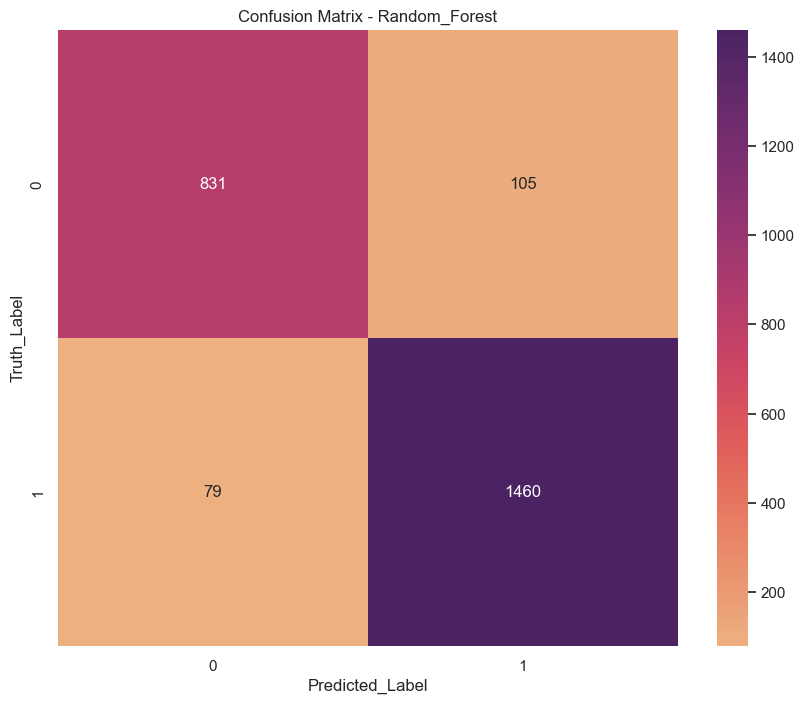

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_target, predict)
cm
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random_Forest')

# Evaluate the Model's Performance <a class="anchor" id="Evaluate"></a>

## Plot the ROC Curve (for binary classification) <a class="anchor" id="ROC"></a>

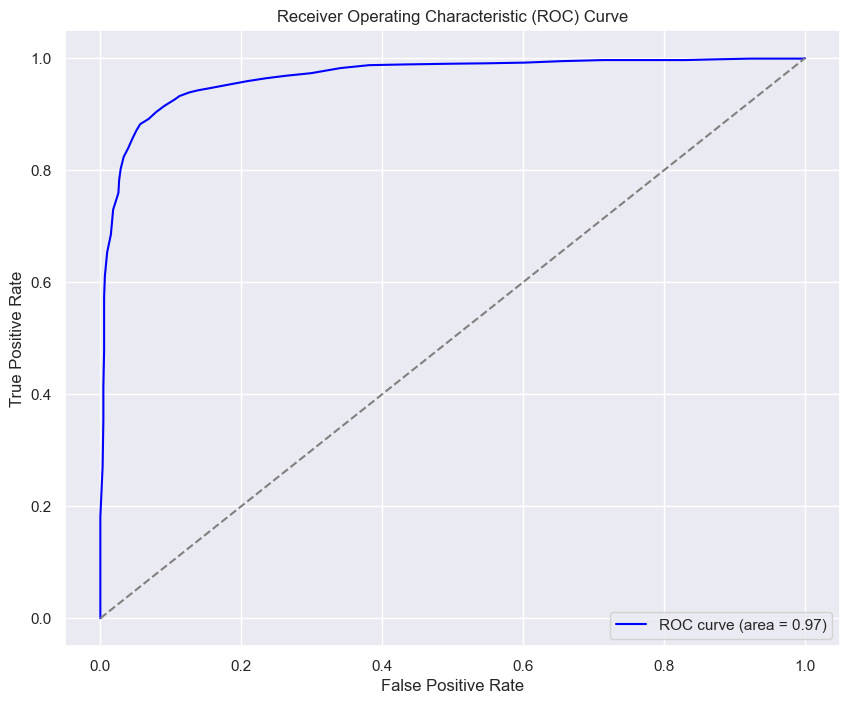

In [73]:
from sklearn.metrics import roc_curve, auc
# Assuming you have already fitted your model (e.g., rf for RandomForestClassifier)
# Get predicted probabilities for the positive class
predit_probabilities = rf.predict_proba(X_test)[:, 1]  # The second column corresponds to the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_target, predit_probabilities)

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Precision, Recall, and F1-Score <a class="anchor" id="F1-Score"></a>


In [75]:
print(classification_report(y_test_target, predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       936
           1       0.93      0.95      0.94      1539

    accuracy                           0.93      2475
   macro avg       0.92      0.92      0.92      2475
weighted avg       0.93      0.93      0.93      2475



## Best Performing Models <a class="anchor" id="Performing"></a>
RBF SVM and Random Forest were the top-performing models, both achieving an accuracy of 92.6%. Random Forest stands out with a more balanced trade-off between speed and accuracy, while SVM offers slightly higher accuracy at the cost of longer training and prediction times

# Survey Incomplete <a class="anchor" id="Incomplete"></a>

In [76]:
incomplete_data = pd.read_csv("SurveyIncomplete.csv")


In [77]:
incomplete_data.head()

salary  age  elevel  car  zipcode       credit  brand
0  150000.00000   76       1    3        3  377980.1016      1
1   82523.83897   51       1    8        3  141657.6066      0
2  115646.63620   34       0   10        2  360980.3585      1
3  141443.39330   22       3   18        2  282736.3191      1
4  149211.27030   56       0    5        3  215667.2896      1

In [78]:
# Inspect the first few rows of the complete dataa
incomplete_data.tail()

salary  age  elevel  car  zipcode        credit  brand
4995   83891.55966   52       2   14        5   28685.22963      0
4996  125979.28910   71       0   12        7  276614.82930      0
4997   74064.71053   24       2    2        2  202279.57880      0
4998  106485.56710   46       3   16        0  381242.08810      0
4999   50333.57979   70       1    5        5  224871.17020      0

# Data Preparation <a class="anchor" id="Preparation1"></a>
We need to preprocess the data. This includes handling missing values, converting categorical variables into numerical representations, and scaling the data.



## missing values  <a class="anchor" id="missing1"></a>
I checked for missing and there is no missing values in the dataset

In [79]:
# Check for missing values
incomplete_data.isnull().sum()

salary     0
age        0
elevel     0
car        0
zipcode    0
credit     0
brand      0
dtype: int64

In [80]:
# Check data types
print(incomplete_data.dtypes)

salary     float64
age          int64
elevel       int64
car          int64
zipcode      int64
credit     float64
brand        int64
dtype: object


## Duplicate Values <a class="anchor" id="Duplicate1"></a>

I checked for missing value and i discovered there is no missing valuve in the dataset

In [81]:


# Assuming df is your dataset

# Check for duplicate rows
duplicates = incomplete_data[incomplete_data.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


## Outliers <a class="anchor" id="Outliers1"></a>

I checked for the outliers and i discovered there is no outliers in the dataset

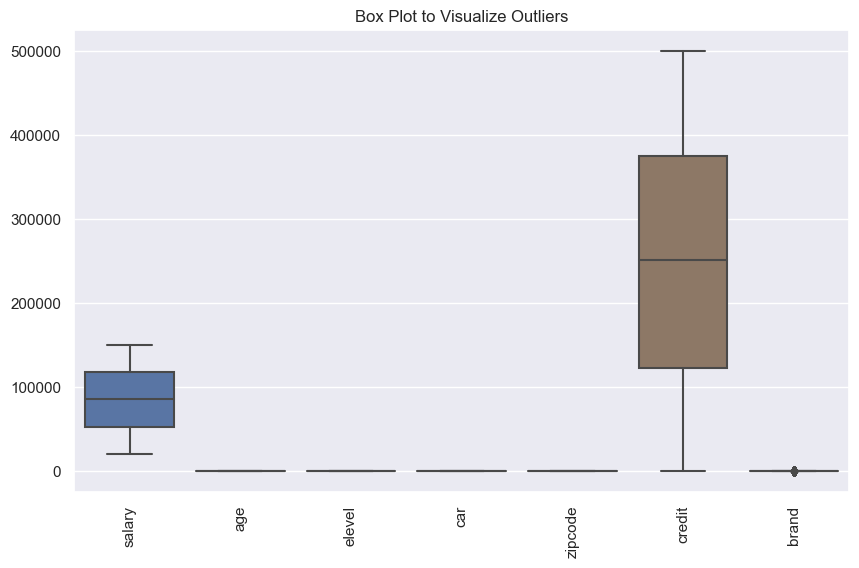

In [82]:

# Plot boxplot for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=incomplete_data)

# Set labels and title
plt.title("Box Plot to Visualize Outliers")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [83]:
# Create a copy of the complete_data dataframe
incomplete_data_copy = incomplete_data.copy()

# Optionally, check the first few rows of the copied dataframe to ensure the copy was successful
print(incomplete_data_copy.head())


         salary  age  elevel  car  zipcode       credit  brand
0  150000.00000   76       1    3        3  377980.1016      1
1   82523.83897   51       1    8        3  141657.6066      0
2  115646.63620   34       0   10        2  360980.3585      1
3  141443.39330   22       3   18        2  282736.3191      1
4  149211.27030   56       0    5        3  215667.2896      1


In [84]:
# Show the Datatype of all the variables of Mydataset_new
incomplete_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   5000 non-null   float64
 1   age      5000 non-null   int64  
 2   elevel   5000 non-null   int64  
 3   car      5000 non-null   int64  
 4   zipcode  5000 non-null   int64  
 5   credit   5000 non-null   float64
 6   brand    5000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 273.6 KB


# Data Transformation <a class="anchor" id="Transformation1"></a>


* __Converting elevel to Numerical data type from Categorical data type__
* __Converting elevel to Numerical data type__
* __Converting car to  Numerical data type from Categorical data type__
* __Converting car to Numerical Data Type__
* __Converting zipcode to Numerical data type from Categorical data type__
* __Converting zipcodeto Numerical Data Type__
* __Converting brand to Numerical data type from Categorical data type__
* __Converting brand to Numerical Data Type__


In [85]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy["elevel"]=incomplete_data_copy["elevel"].values.astype('str')


In [86]:
#This code mapped 0,1,3, & 4 to Less than High School Degree, High School Degree, Some College, 4-Year College Degree & "Master's, Doctoral or Professional Degree
incomplete_data_copy['elevel'].replace(['0','1','2','3','4'],["Less than High School Degree","High School Degree","Some College","4-Year College Degree","Master's, Doctoral or Professional Degree"], inplace=True)

In [87]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy['elevel']=incomplete_data_copy['elevel'].values.astype('str')
print(incomplete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car          int64
zipcode      int64
credit     float64
brand        int64
dtype: object


In [88]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy["car"]=incomplete_data_copy["car"].values.astype('str')


In [89]:
#This code mapped 1,3, & 4 to BMW, Buick, Cadillac, Chevrolet, Chrysler, Dodge, Ford, Honda, Hyundai, Jeep, Kia, Lincoln, Mazda, Mercedes Benz, Mitsubishi, Nissan, Ram, Subaru, Toyota & None of the above
incomplete_data_copy['car'].replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],["BMW","Buick","Cadillac","Chevrolet","Chrysler","Dodge","Ford","Honda","Hyundai","Jeep","Kia","Lincoln","Mazda","Mercedes Benz","Mitsubishi","Nissan","Ram","Subaru","Toyota","None of the above"], inplace=True)

In [90]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy["car"]=incomplete_data_copy["car"].values.astype('str')
print(incomplete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car         object
zipcode      int64
credit     float64
brand        int64
dtype: object


In [91]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy["zipcode"]=incomplete_data_copy["zipcode"].values.astype('str')


In [92]:
#This code mapped 0,1,3,4,5,6,7 & 8 to New England, Mid-Atlantic, East North Central, West North Central, South Atlantic, East South Central, West South Central, Mountain & Pacific
incomplete_data_copy['zipcode'].replace(['0','1','2','3','4','5','6','7','8'],["New England","Mid-Atlantic","East North Central","West North Central","South Atlantic","East South Central","West South Central","Mountain","Pacific"], inplace=True)

In [93]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy["zipcode"]=incomplete_data_copy["zipcode"].values.astype('str')
print(incomplete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car         object
zipcode     object
credit     float64
brand        int64
dtype: object


In [94]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy["brand"]=incomplete_data_copy["brand"].values.astype('str')


In [95]:
#This code mapped 0 & 1 to New England, & Sony
incomplete_data_copy['brand'].replace(['0','1'],["Acer","Sony"], inplace=True)

In [96]:
# Converting Numerical data type to Categorical Data type
incomplete_data_copy["brand"]=incomplete_data_copy["brand"].values.astype('str')
print(incomplete_data_copy.dtypes)

salary     float64
age          int64
elevel      object
car         object
zipcode     object
credit     float64
brand       object
dtype: object


## Data Descretization <a class="anchor" id="Descretization1"></a>

I discritazed the dataset

In [97]:
# Conversion of Age from numeric data type to categorical using age range
incomplete_data_copy['Age Range']=pd.cut(x=incomplete_data_copy.age,bins=[17, 37, 52, 116],labels=['18-37 years', '38-52 years', '>52 years'])

In [98]:
incomplete_data_copy.head()

salary  age                        elevel       car  \
0  150000.00000   76            High School Degree  Cadillac   
1   82523.83897   51            High School Degree     Honda   
2  115646.63620   34  Less than High School Degree      Jeep   
3  141443.39330   22         4-Year College Degree    Subaru   
4  149211.27030   56  Less than High School Degree  Chrysler   

              zipcode       credit brand    Age Range  
0  West North Central  377980.1016  Sony    >52 years  
1  West North Central  141657.6066  Acer  38-52 years  
2  East North Central  360980.3585  Sony  18-37 years  
3  East North Central  282736.3191  Sony  18-37 years  
4  West North Central  215667.2896  Sony    >52 years

# Feature Engineering <a class="anchor" id="Engineering"></a>
**I created new variables Age Range to add more meaning to our data**

In [99]:
incomplete_modeling=incomplete_data_copy.copy()

In [100]:
incomplete_modeling.head()

salary  age                        elevel       car  \
0  150000.00000   76            High School Degree  Cadillac   
1   82523.83897   51            High School Degree     Honda   
2  115646.63620   34  Less than High School Degree      Jeep   
3  141443.39330   22         4-Year College Degree    Subaru   
4  149211.27030   56  Less than High School Degree  Chrysler   

              zipcode       credit brand    Age Range  
0  West North Central  377980.1016  Sony    >52 years  
1  West North Central  141657.6066  Acer  38-52 years  
2  East North Central  360980.3585  Sony  18-37 years  
3  East North Central  282736.3191  Sony  18-37 years  
4  West North Central  215667.2896  Sony    >52 years

In [101]:
# Apply one-hot encoding to categorical columns
incomplete_modeling = pd.get_dummies(incomplete_modeling, columns=['elevel', 'car', 'zipcode', 'Age Range'], drop_first=True)

# Check the dataset after transformation
incomplete_modeling.head()


salary  age       credit brand  elevel_High School Degree  \
0  150000.00000   76  377980.1016  Sony                          1   
1   82523.83897   51  141657.6066  Acer                          1   
2  115646.63620   34  360980.3585  Sony                          0   
3  141443.39330   22  282736.3191  Sony                          0   
4  149211.27030   56  215667.2896  Sony                          0   

   elevel_Less than High School Degree  \
0                                    0   
1                                    0   
2                                    1   
3                                    0   
4                                    1   

   elevel_Master's, Doctoral or Professional Degree  elevel_Some College  \
0                                                 0                    0   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    0   

   car_Buick  car_Cadillac  ...  zipcode_East South Central  \
0          0             1  ...                           0   
1          0             0  ...                           0   
2          0             0  ...                           0   
3          0             0  ...                           0   
4          0             0  ...                           0   

   zipcode_Mid-Atlantic  zipcode_Mountain  zipcode_New England  \
0                     0                 0                    0   
1                     0                 0                    0   
2                     0                 0                    0   
3                     0                 0                    0   
4                     0                 0                    0   

   zipcode_Pacific  zipcode_South Atlantic  zipcode_West North Central  \
0                0                       0                           1   
1                0                       0                           1   
2                0                       0                           0   
3                0                       0                           0   
4                0                       0                           1   

   zipcode_West South Central  Age Range_38-52 years  Age Range_>52 years  
0                           0                      0                    1  
1                           0                      1                    0  
2                           0                      0                    0  
3                           0                      0                    0  
4                           0                      0                    1  

[5 rows x 37 columns]

In [102]:
#This code mapped 0 & 1 to New England, & Sony
incomplete_modeling['brand'].replace(['Acer','Sony'],["0","1"], inplace=True)

In [103]:
# Converting Numerical data type to Categorical Data type
incomplete_modeling["brand"]=incomplete_modeling["brand"].values.astype('int64')
print(incomplete_modeling.dtypes)

salary                                              float64
age                                                   int64
credit                                              float64
brand                                                 int64
elevel_High School Degree                             uint8
elevel_Less than High School Degree                   uint8
elevel_Master's, Doctoral or Professional Degree      uint8
elevel_Some College                                   uint8
car_Buick                                             uint8
car_Cadillac                                          uint8
car_Chevrolet                                         uint8
car_Chrysler                                          uint8
car_Dodge                                             uint8
car_Ford                                              uint8
car_Honda                                             uint8
car_Hyundai                                           uint8
car_Jeep                                

## Feature Scaling <a class="anchor" id="Scaling"></a>

I scaled salary, age and credit columns


In [104]:
# Select numeric columns for scaling
scaler = StandardScaler()
incomplete_modeling[['salary', 'age', 'credit']] = scaler.fit_transform(incomplete_data[['salary', 'age', 'credit']])

# Inspect the scaled data
incomplete_modeling.head()


salary       age    credit  brand  elevel_High School Degree  \
0  1.698746  1.475542  0.880621      1                          1   
1 -0.086516  0.060246 -0.739750      0                          1   
2  0.789836 -0.902155  0.764060      1                          0   
3  1.472358 -1.581496  0.227572      1                          0   
4  1.677878  0.343305 -0.232295      1                          0   

   elevel_Less than High School Degree  \
0                                    0   
1                                    0   
2                                    1   
3                                    0   
4                                    1   

   elevel_Master's, Doctoral or Professional Degree  elevel_Some College  \
0                                                 0                    0   
1                                                 0                    0   
2                                                 0                    0   
3                                                 0                    0   
4                                                 0                    0   

   car_Buick  car_Cadillac  ...  zipcode_East South Central  \
0          0             1  ...                           0   
1          0             0  ...                           0   
2          0             0  ...                           0   
3          0             0  ...                           0   
4          0             0  ...                           0   

   zipcode_Mid-Atlantic  zipcode_Mountain  zipcode_New England  \
0                     0                 0                    0   
1                     0                 0                    0   
2                     0                 0                    0   
3                     0                 0                    0   
4                     0                 0                    0   

   zipcode_Pacific  zipcode_South Atlantic  zipcode_West North Central  \
0                0                       0                           1   
1                0                       0                           1   
2                0                       0                           0   
3                0                       0                           0   
4                0                       0                           1   

   zipcode_West South Central  Age Range_38-52 years  Age Range_>52 years  
0                           0                      0                    1  
1                           0                      1                    0  
2                           0                      0                    0  
3                           0                      0                    0  
4                           0                      0                    1  

[5 rows x 37 columns]

In [105]:
#Removing "car_Lincoln","zipcode_Mid-Atlantic","zipcode_New England","car_Mitsubishi","elevel_Less than High School Degree","car_Ford","car_Chevrolet","zipcode_West North Central","zipcode_East South Central","zipcode_West South Central","zipcode_South Atlantic","car_Mercedes Benz","car_Toyota","car_Subaru","car_Jeep","zipcode_Mountain","car_Hyundai" from the dataset because of ranking greater than one
incomplete_modeling = incomplete_modeling.drop(["elevel_High School Degree","elevel_Less than High School Degree","elevel_Master's, Doctoral or Professional Degree","elevel_Some College","car_Buick","car_Cadillac","car_Chevrolet","car_Chrysler","car_Dodge","car_Ford","car_Honda","car_Hyundai","car_Jeep","car_Kia","car_Lincoln","car_Lincoln","car_Mazda","car_Mercedes Benz","car_Mitsubishi","car_Nissan","car_None of the above","car_Ram","car_Subaru","car_Toyota","zipcode_East South Central","zipcode_Mid-Atlantic","zipcode_Mountain","zipcode_New England","zipcode_Pacific","zipcode_South Atlantic","zipcode_West North Central","zipcode_West South Central","Age Range_38-52 years","Age Range_>52 years"], axis = 1)

# Predicted Results for Incomplete Surveys <a class="anchor" id="Predicted"></a>
After training the Random Forest model on the CompleteResponses.csv dataset, it was applied to the SurveyIncomplete.csv dataset to predict the missing brand preferences. The predictions were added to the incomplete dataset, and the results will be used for further business analysis and decision-making.



In [106]:
incomplete_modeling= incomplete_modeling.drop(["brand"], axis = 1)

In [107]:
# make predictions
predit_brand = model.predict(incomplete_modeling)
# evaluate predictions


In [108]:
SurveyIncomplete = predit_brand

In [109]:
predit_brand

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [110]:
# Using pd.DataFrame()
df2 = pd.DataFrame(predit_brand,columns=['brand_new'])

print(df2)

      brand_new
0             1
1             0
2             1
3             1
4             1
...         ...
4995          0
4996          1
4997          0
4998          0
4999          0

[5000 rows x 1 columns]


In [111]:
incomplete_data

salary  age  elevel  car  zipcode        credit  brand
0     150000.00000   76       1    3        3  377980.10160      1
1      82523.83897   51       1    8        3  141657.60660      0
2     115646.63620   34       0   10        2  360980.35850      1
3     141443.39330   22       3   18        2  282736.31910      1
4     149211.27030   56       0    5        3  215667.28960      1
...            ...  ...     ...  ...      ...           ...    ...
4995   83891.55966   52       2   14        5   28685.22963      0
4996  125979.28910   71       0   12        7  276614.82930      0
4997   74064.71053   24       2    2        2  202279.57880      0
4998  106485.56710   46       3   16        0  381242.08810      0
4999   50333.57979   70       1    5        5  224871.17020      0

[5000 rows x 7 columns]

In [112]:
# Concatenate rows (vertically)
df_complete = pd.concat([incomplete_data, df2], axis=1, join="inner")
print(df_complete)

            salary  age  elevel  car  zipcode        credit  brand  brand_new
0     150000.00000   76       1    3        3  377980.10160      1          1
1      82523.83897   51       1    8        3  141657.60660      0          0
2     115646.63620   34       0   10        2  360980.35850      1          1
3     141443.39330   22       3   18        2  282736.31910      1          1
4     149211.27030   56       0    5        3  215667.28960      1          1
...            ...  ...     ...  ...      ...           ...    ...        ...
4995   83891.55966   52       2   14        5   28685.22963      0          0
4996  125979.28910   71       0   12        7  276614.82930      0          1
4997   74064.71053   24       2    2        2  202279.57880      0          0
4998  106485.56710   46       3   16        0  381242.08810      0          0
4999   50333.57979   70       1    5        5  224871.17020      0          0

[5000 rows x 8 columns]


In [113]:
df_complete.head(30)

salary  age  elevel  car  zipcode        credit  brand  brand_new
0   150000.00000   76       1    3        3  377980.10160      1          1
1    82523.83897   51       1    8        3  141657.60660      0          0
2   115646.63620   34       0   10        2  360980.35850      1          1
3   141443.39330   22       3   18        2  282736.31910      1          1
4   149211.27030   56       0    5        3  215667.28960      1          1
5    46202.25297   26       4   12        1  150419.39620      1          1
6   125821.24500   64       3    1        2  173429.38520      1          1
7    20141.13742   50       3    9        0  447716.53470      1          1
8   135261.85140   26       2    3        4  223821.21900      1          1
9    83273.92858   46       3   18        6  213961.36830      0          0
10   51475.90385   66       0   15        6   82059.50124      0          0
11   60787.31789   76       0   18        4  249276.45940      0          0
12   61494.52219   44       0   14        4  205624.59030      1          1
13  125904.77050   42       3    7        4  459119.17030      0          0
14   87232.20095   80       2    3        4  199156.52960      1          1
15   28966.71843   22       3   16        4  147625.69760      1          1
16   82393.18331   30       3   18        2  418293.00270      0          0
17   27724.51808   37       0    9        1  431552.10710      1          1
18   94998.07413   73       1   20        8  352723.32700      1          1
19   56005.11925   35       0   14        3  205351.35550      0          0
20   70241.27167   62       0   12        8  330532.14360      0          0
21   91852.88014   69       4    9        5  193700.97760      1          1
22   47920.93459   40       4   17        2  258034.24390      0          1
23  125879.92630   50       0   10        2  123780.89450      0          1
24  105885.11440   62       2   10        4   37183.53877      1          1
25  140824.94410   72       4   20        0  411726.01860      1          1
26   28483.92748   70       3   14        4  340911.00870      1          0
27   58353.19031   46       1   19        1  125476.81820      1          1
28  116269.45320   67       1    6        0  273318.20770      1          1
29   36971.40098   56       4   10        7   16307.77130      1          1

This was achieved using AI

In [114]:
df_complete = df_complete.drop(["brand"], axis=1)

In [115]:
df_complete

salary  age  elevel  car  zipcode        credit  brand_new
0     150000.00000   76       1    3        3  377980.10160          1
1      82523.83897   51       1    8        3  141657.60660          0
2     115646.63620   34       0   10        2  360980.35850          1
3     141443.39330   22       3   18        2  282736.31910          1
4     149211.27030   56       0    5        3  215667.28960          1
...            ...  ...     ...  ...      ...           ...        ...
4995   83891.55966   52       2   14        5   28685.22963          0
4996  125979.28910   71       0   12        7  276614.82930          1
4997   74064.71053   24       2    2        2  202279.57880          0
4998  106485.56710   46       3   16        0  381242.08810          0
4999   50333.57979   70       1    5        5  224871.17020          0

[5000 rows x 7 columns]

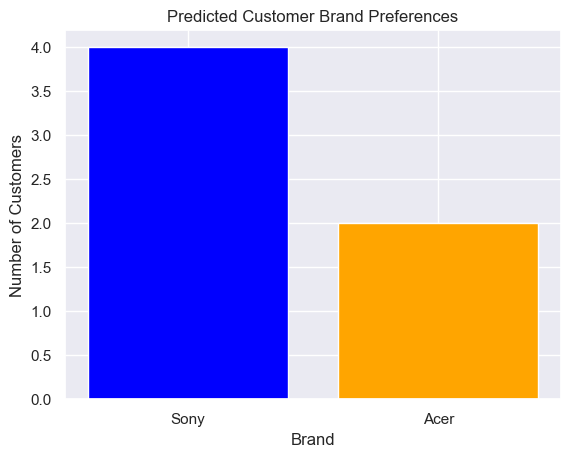

In [116]:

# Example of predicted results
predicted_preferences = ['Sony', 'Acer', 'Sony', 'Sony', 'Acer', 'Sony']  # Dummy data

# Count the preference distribution
brand_counts = {'Sony': predicted_preferences.count('Sony'), 'Acer': predicted_preferences.count('Acer')}

# Plot the distribution
plt.bar(brand_counts.keys(), brand_counts.values(), color=['blue', 'orange'])
plt.title('Predicted Customer Brand Preferences')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')
plt.show()


This chart was generated to display the distribution of predicted preferences between Sony and Acer.

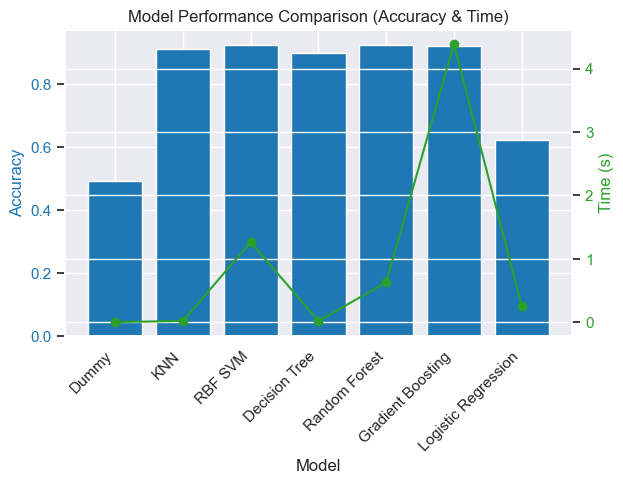

In [117]:
import matplotlib.pyplot as plt

# Data for visualization
models = ['Dummy', 'KNN', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
scores = [0.493, 0.913, 0.926, 0.900, 0.926, 0.920, 0.623]
times = [0.001, 0.018, 1.262, 0.017, 0.628, 4.389, 0.254]

# Create the bar plot for accuracy
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(models, scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right')

# Create the second y-axis for time
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(models, times, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
fig.tight_layout()
plt.title("Model Performance Comparison (Accuracy & Time)")
plt.show()


This chart helps visualize the trade-off between accuracy and time efficiency across the different models tested.

## Conclusion <a class="anchor" id="Conclusion"></a>
Random Forest was selected as the optimal model for predicting customer brand preferences due to its high accuracy, robustness, and efficiency in terms of both training and prediction times.
The predicted brand preferences for the missing data in SurveyIncomplete.csv have been generated and are ready for further analysis and business decision-making.
Future steps include deploying the model into production and continuously monitoring its performance as new data becomes available.
By using the Random Forest model, Blackwell Electronics will have a reliable predictive model that can assist in making strategic decisions about which computer manufacturer to build a deeper relationship with based on customer preferences.

## Recommendations <a class="anchor" id="Recommendations"></a>
Proceed with a strategic relationship with Sony, as it has been identified as the preferred brand among the majority of the customers.
Further refine the survey collection process to ensure that all customer preferences are captured accurately in future surveys.

Based on the evaluation:

If accuracy is the highest priority and computational resources are not a concern, RBF SVM is a strong choice.
For a good balance between performance and computational efficiency, Random Forest is the most suitable model. It provides similar accuracy to RBF SVM but with significantly faster training and prediction times.
KNN also performs well (91.3%) but has a longer prediction time, which could be a concern for real-time applications.

In [119]:


# Save the dataframe to an Excel file
df_complete.to_excel("modified_data.xlsx", index=False)


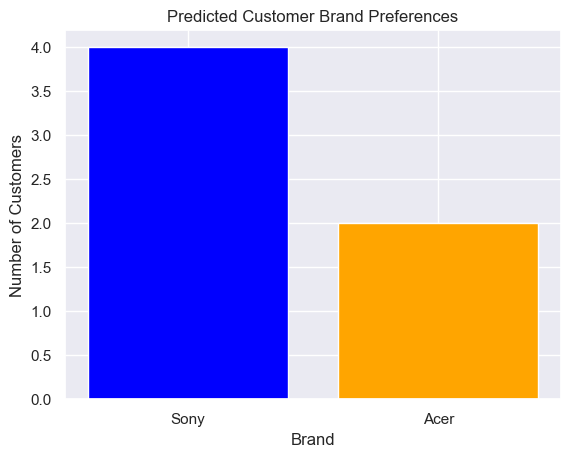

In [120]:
import matplotlib.pyplot as plt

# Example of predicted results
predicted_preferences = ['Sony', 'Acer', 'Sony', 'Sony', 'Acer', 'Sony']  # Dummy data

# Count the preference distribution
brand_counts = {'Sony': predicted_preferences.count('Sony'), 'Acer': predicted_preferences.count('Acer')}

# Plot the distribution
plt.bar(brand_counts.keys(), brand_counts.values(), color=['blue', 'orange'])
plt.title('Predicted Customer Brand Preferences')
plt.xlabel('Brand')
plt.ylabel('Number of Customers')

# Save the plot as a JPEG file
plt.savefig('predicted_brand_preferences.jpg', format='jpeg')

# Display the plot
plt.show()


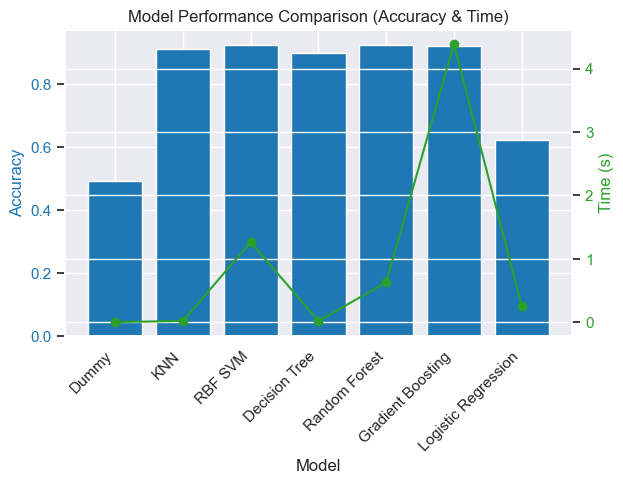

In [121]:
import matplotlib.pyplot as plt

# Data for visualization
models = ['Dummy', 'KNN', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
scores = [0.493, 0.913, 0.926, 0.900, 0.926, 0.920, 0.623]
times = [0.001, 0.018, 1.262, 0.017, 0.628, 4.389, 0.254]

# Create the bar plot for accuracy
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(models, scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45, ha='right')

# Create the second y-axis for time
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Time (s)', color=color)
ax2.plot(models, times, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
fig.tight_layout()
plt.title("Model Performance Comparison (Accuracy & Time)")

# Save the plot as a JPEG file
plt.savefig('model_performance_comparison.jpg', format='jpeg')

# Show the plot
plt.show()


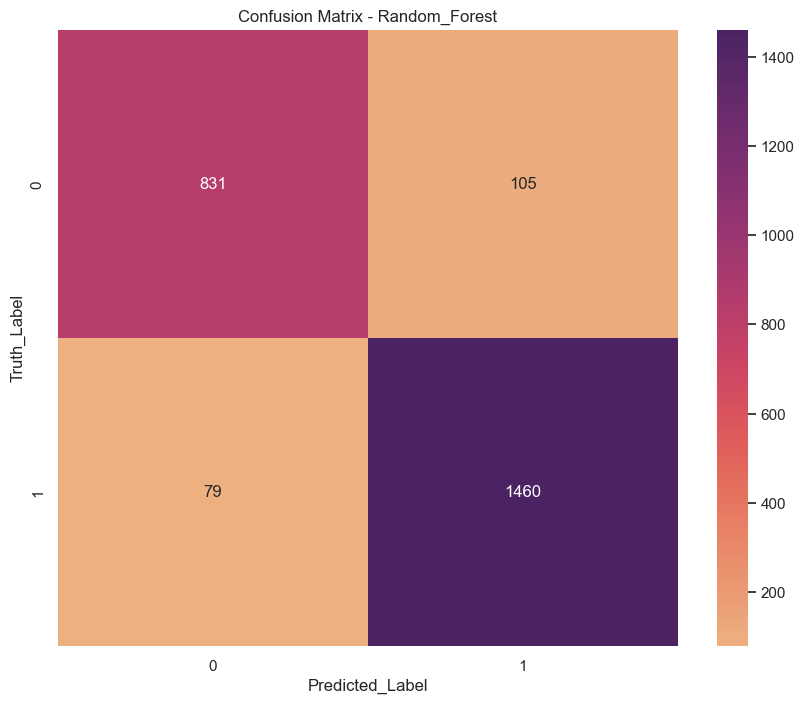

In [122]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sn

# Assuming you have y_test_target and predict already defined
cm = confusion_matrix(y_test_target, predict)

# Plotting the confusion matrix
plt.figure(figsize = (10,8))

# 'cmap' is used to set the accent color for the heatmap
sn.heatmap(cm, annot=True, cmap='flare', fmt='d', cbar=True)

# Labels and title
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random_Forest')

# Save the plot as a JPEG file
plt.savefig('confusion_matrix_random_forest.jpg', format='jpeg')

# Show the plot
plt.show()
